# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings 
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import datetime as dt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file
os.chdir(r'C:\Users\Dinesh\ML & AI Learning\EDA_Case_Study\Datasets and Dictionary\trip_records')
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [9]:
df.shape

(3041714, 19)

In [11]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [20]:
df['pickup_date'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.date
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day
df['pickup_time'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.time
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

  pickup_date  pickup_month  pickup_day pickup_time  pickup_hour  
0  2023-01-01             1           1    00:32:10            0  
1  2023-01-01             1           1    00:55:08            0  
2  2023-01-01             1           1    00:25:04            0  
3  2023-01-01             1           1    00:03:48            0  
4  2023-01-01             1           1    00:10:29            0

In [22]:
sampled_data = pd.DataFrame()
for i in df.pickup_day.unique():
    # print(i)
    for j in df.pickup_hour.unique():
        # print(i,j)
        hour_data = df[(df['pickup_day'] == i) & (df['pickup_hour'] == j)]
        # print(i,j,hour_data.shape)
        sample = hour_data.sample(frac = 0.05, random_state = 42)
        sampled_data = pd.concat([sampled_data, sample]).reset_index(drop=True)

sampled_data.shape

(152087, 24)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [24]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
def data_loading(df):
    sampled_data = pd.DataFrame()
    df['pickup_date'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.date
    df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
    df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day
    df['pickup_time'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.time
    df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

    for i in df.pickup_day.unique():
        # print(i)
        for j in df.pickup_hour.unique():
            # print(i,j)
            hour_data = df[(df['pickup_day'] == i) & (df['pickup_hour'] == j)]
            # print(i,j,hour_data.shape)
            sample = hour_data.sample(frac = 0.007, random_state = 42)
            sampled_data = pd.concat([sampled_data, sample]).reset_index(drop=True)
    
    return sampled_data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [38]:
%%time
#Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\Dinesh\ML & AI Learning\EDA_Case_Study\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
# df = pd.DataFrame()

master_df = pd.DataFrame()
total_rows = 0
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        
        # for i in file_name:
        print(file_name)
        df = pd.read_parquet(file_name)
        print('month file {i} with shape of '.format(i=file_name), df.shape)

        total_rows = total_rows + df.shape[0]

        sample_df = data_loading(df)

        
        master_df = pd.concat([master_df,sample_df],axis=0)

        del df, sample_df


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        # sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        # df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

2023-1.parquet
month file 2023-1.parquet with shape of  (3041714, 19)
2023-10.parquet
month file 2023-10.parquet with shape of  (3485185, 19)
2023-11.parquet
month file 2023-11.parquet with shape of  (3302857, 19)
2023-12.parquet
month file 2023-12.parquet with shape of  (3333925, 19)
2023-2.parquet
month file 2023-2.parquet with shape of  (3374086, 19)
2023-3.parquet
month file 2023-3.parquet with shape of  (3275796, 19)
2023-4.parquet
month file 2023-4.parquet with shape of  (2792901, 19)
2023-5.parquet
month file 2023-5.parquet with shape of  (2889185, 19)
2023-6.parquet
month file 2023-6.parquet with shape of  (3258261, 19)
2023-7.parquet
month file 2023-7.parquet with shape of  (3481547, 19)
2023-8.parquet
month file 2023-8.parquet with shape of  (2875947, 19)
2023-9.parquet
month file 2023-9.parquet with shape of  (2817156, 19)
CPU times: total: 6min 12s
Wall time: 3min 26s


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [42]:
master_df.shape

(265493, 25)

In [44]:
total_rows

37928560

In [48]:
# Store the df in csv/parquet
master_df.to_csv('sampled_data_007_perc.csv',index=False)

In [46]:
del master_df

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [90]:
# Load the new data file
df = pd.read_csv('sampled_data_007_perc.csv')


In [91]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        15.60    1.0      0.5        4.12           0.0   
1             1        12.80    1.0      0.5        3.56           0.0   
2             1        14.90    1.0      0.5        3.98           0.0   
3             2        24.70    1.0      0.5        0.00           0.0   
4             0        36.83    0.0      0.5        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         24.72                   2.5          0.0   
1                    1.0         21.36                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         29.70                   2.5          0.0   
4                    1.0         49.00                   NaN          NaN   

  pickup_date  pickup_month  pickup_day pickup_time  pickup_hour  Airport_fee  
0  2023-01-01             1           1    00:31:50            0          NaN  
1  2023-01-01             1           1    00:10:50            0          NaN  
2  2023-01-01             1           1    00:25:37            0          NaN  
3  2023-01-01             1           1    00:27:26            0          NaN  
4  2023-01-01             1           1    00:59:15            0          NaN

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265493 entries, 0 to 265492
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               265493 non-null  int64  
 1   tpep_pickup_datetime   265493 non-null  object 
 2   tpep_dropoff_datetime  265493 non-null  object 
 3   passenger_count        256665 non-null  float64
 4   trip_distance          265493 non-null  float64
 5   RatecodeID             256665 non-null  float64
 6   store_and_fwd_flag     256665 non-null  object 
 7   PULocationID           265493 non-null  int64  
 8   DOLocationID           265493 non-null  int64  
 9   payment_type           265493 non-null  int64  
 10  fare_amount            265493 non-null  float64
 11  extra                  265493 non-null  float64
 12  mta_tax                265493 non-null  float64
 13  tip_amount             265493 non-null  float64
 14  tolls_amount           265493 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [98]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True,inplace=True)
df = df.drop(['mta_tax','improvement_surcharge'],axis=1)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             0        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge  airport_fee pickup_date  pickup_month  pickup_day  \
0                   2.5          0.0  2023-01-01             1           1   
1                   2.5          0.0  2023-01-01             1           1   
2                   2.5          0.0  2023-01-01             1           1   
3                   2.5          0.0  2023-01-01             1           1   
4                   NaN          NaN  2023-01-01             1           1   

  pickup_time  pickup_hour  Airport_fee  
0    00:31:50            0          NaN  
1    00:10:50            0          NaN  
2    00:25:37            0          NaN  
3    00:27:26            0          NaN  
4    00:59:15            0          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [101]:
# Combine the two airport fee columns

df['airport_fees'] = np.where(df['Airport_fee'].isnull(), df['airport_fee'], df['Airport_fee'])
df.drop(columns=['Airport_fee','airport_fee'],inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             0        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   NaN  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  
0            0           0.0  
1            0           0.0  
2            0           0.0  
3            0           0.0  
4            0           NaN

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

- Used `Describe()` method to check the minimum values in each numerical column and found four columns with negative values.
    - total_amount
    - airport_fees
    - congestion_surcharge
    - extra

In [105]:
# check where values of fare amount are negative

df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  265493.00000    256665.000000  265493.000000  256665.000000   
mean        1.73362         1.367300       3.582801       1.659361   
std         0.44757         0.891013      48.595268       7.555613   
min         1.00000         0.000000       0.000000       1.000000   
25%         1.00000         1.000000       1.050000       1.000000   
50%         2.00000         1.000000       1.800000       1.000000   
75%         2.00000         1.000000       3.400000       1.000000   
max         6.00000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  265493.000000  265493.000000  265493.000000  265493.000000   
mean      165.153416     163.901835       1.164807      19.834438   
std        64.073056      69.822486       0.506106      18.199228   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     910.000000   

               extra     tip_amount   tolls_amount   total_amount  \
count  265493.000000  265493.000000  265493.000000  265493.000000   
mean        1.587965       3.549137       0.594247      28.897671   
std         1.825169       4.053233       2.180388      22.769005   
min        -2.500000       0.000000       0.000000      -4.000000   
25%         0.000000       1.000000       0.000000      15.960000   
50%         1.000000       2.850000       0.000000      21.100000   
75%         2.500000       4.420000       0.000000      30.800000   
max        14.250000     150.290000     143.000000     911.000000   

       congestion_surcharge   pickup_month     pickup_day    pickup_hour  \
count         256665.000000  265493.000000  265493.000000  265493.000000   
mean               2.307424       6.540786      15.517739      14.265740   
std                0.666820       3.466868       8.695845       5.806831   
min               -2.500000       1.000000       1.000000       0.000000   
25%                2.500000       4.000000       8.000000      11.000000   
50%                2.500000       6.000000      15.000000      15.000000   
75%                2.500000      10.000000      23.000000      19.000000   
max                2.500000      12.000000      31.000000      23.000000   

        airport_fees  
count  256665.000000  
mean        0.142998  
std         0.464716  
min        -1.750000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

Did you notice something different in the `RatecodeID` column for above records?

In [108]:
# Analyse RatecodeID for the negative fare amounts

df['RatecodeID'].value_counts().sort_index()

RatecodeID
1.0     242291
2.0      10049
3.0        848
4.0        520
5.0       1424
99.0      1533
Name: count, dtype: int64

#### Note
- there are no negitave values in my sampled data for `RatecodeID` column

In [111]:
# Find which columns have negative values

df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  265493.00000    256665.000000  265493.000000  256665.000000   
mean        1.73362         1.367300       3.582801       1.659361   
std         0.44757         0.891013      48.595268       7.555613   
min         1.00000         0.000000       0.000000       1.000000   
25%         1.00000         1.000000       1.050000       1.000000   
50%         2.00000         1.000000       1.800000       1.000000   
75%         2.00000         1.000000       3.400000       1.000000   
max         6.00000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  265493.000000  265493.000000  265493.000000  265493.000000   
mean      165.153416     163.901835       1.164807      19.834438   
std        64.073056      69.822486       0.506106      18.199228   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     910.000000   

               extra     tip_amount   tolls_amount   total_amount  \
count  265493.000000  265493.000000  265493.000000  265493.000000   
mean        1.587965       3.549137       0.594247      28.897671   
std         1.825169       4.053233       2.180388      22.769005   
min        -2.500000       0.000000       0.000000      -4.000000   
25%         0.000000       1.000000       0.000000      15.960000   
50%         1.000000       2.850000       0.000000      21.100000   
75%         2.500000       4.420000       0.000000      30.800000   
max        14.250000     150.290000     143.000000     911.000000   

       congestion_surcharge   pickup_month     pickup_day    pickup_hour  \
count         256665.000000  265493.000000  265493.000000  265493.000000   
mean               2.307424       6.540786      15.517739      14.265740   
std                0.666820       3.466868       8.695845       5.806831   
min               -2.500000       1.000000       1.000000       0.000000   
25%                2.500000       4.000000       8.000000      11.000000   
50%                2.500000       6.000000      15.000000      15.000000   
75%                2.500000      10.000000      23.000000      19.000000   
max                2.500000      12.000000      31.000000      23.000000   

        airport_fees  
count  256665.000000  
mean        0.142998  
std         0.464716  
min        -1.750000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

- `total_amount`, `airport_fees`, `congestion_surcharge`, `extra` these are amounts so can’t be negative. expecting that negative values are wrongly updated

In [114]:
# fix these negative values

df['total_amount'] = df['total_amount'].abs()
df['airport_fees'] = df['airport_fees'].abs()
df['congestion_surcharge'] = df['congestion_surcharge'].abs()
df['extra'] = df['extra'].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [118]:
missing_value_df = pd.DataFrame(df.isna().sum(),columns=['null_value_count']).reset_index()
missing_value_df['miss_values_percentage'] = round(missing_value_df['null_value_count']/df.shape[0] *100,2)
missing_value_df

index  null_value_count  miss_values_percentage
0                VendorID                 0                    0.00
1    tpep_pickup_datetime                 0                    0.00
2   tpep_dropoff_datetime                 0                    0.00
3         passenger_count              8828                    3.33
4           trip_distance                 0                    0.00
5              RatecodeID              8828                    3.33
6      store_and_fwd_flag              8828                    3.33
7            PULocationID                 0                    0.00
8            DOLocationID                 0                    0.00
9            payment_type                 0                    0.00
10            fare_amount                 0                    0.00
11                  extra                 0                    0.00
12             tip_amount                 0                    0.00
13           tolls_amount                 0                    0.00
14           total_amount                 0                    0.00
15   congestion_surcharge              8828                    3.33
16            pickup_date                 0                    0.00
17           pickup_month                 0                    0.00
18             pickup_day                 0                    0.00
19            pickup_time                 0                    0.00
20            pickup_hour                 0                    0.00
21           airport_fees              8828                    3.33

In [120]:
# Find the proportion of missing values in each column
df.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          8828
trip_distance               0
RatecodeID               8828
store_and_fwd_flag       8828
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     8828
pickup_date                 0
pickup_month                0
pickup_day                  0
pickup_time                 0
pickup_hour                 0
airport_fees             8828
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [123]:
df[df['passenger_count'].isnull()].describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  8828.000000              0.0    8828.000000         0.0   8828.000000   
mean      1.637970              NaN       7.666221         NaN    160.554712   
std       0.615033              NaN     265.354634         NaN     71.963411   
min       1.000000              NaN       0.000000         NaN      1.000000   
25%       1.000000              NaN       0.500000         NaN    107.000000   
50%       2.000000              NaN       2.110000         NaN    161.000000   
75%       2.000000              NaN       4.450000         NaN    234.000000   
max       6.000000              NaN   22528.820000         NaN    265.000000   

       DOLocationID  payment_type  fare_amount        extra   tip_amount  \
count   8828.000000        8828.0  8828.000000  8828.000000  8828.000000   
mean     155.773222           0.0    22.463764     0.169863     2.721006   
std       70.993715           0.0    14.179291     0.730593     3.414542   
min        1.000000           0.0     0.000000     0.000000     0.000000   
25%      107.000000           0.0    12.947500     0.000000     0.000000   
50%      151.500000           0.0    18.580000     0.000000     2.000000   
75%      231.000000           0.0    27.620000     0.000000     4.030000   
max      265.000000           0.0   196.820000     9.250000    40.000000   

       tolls_amount  total_amount  congestion_surcharge  pickup_month  \
count   8828.000000   8828.000000                   0.0   8828.000000   
mean       0.617204     29.722064                   NaN      7.434300   
std        2.286419     17.592357                   NaN      3.498384   
min        0.000000      0.000000                   NaN      1.000000   
25%        0.000000     18.890000                   NaN      4.000000   
50%        0.000000     24.610000                   NaN      8.000000   
75%        0.000000     34.822500                   NaN     11.000000   
max       25.000000    215.570000                   NaN     12.000000   

        pickup_day  pickup_hour  airport_fees  
count  8828.000000  8828.000000           0.0  
mean     15.915723    13.350816           NaN  
std       8.509142     6.582265           NaN  
min       1.000000     0.000000           NaN  
25%       9.000000     8.000000           NaN  
50%      16.000000    14.000000           NaN  
75%      23.000000    19.000000           NaN  
max      31.000000    23.000000           NaN

In [125]:
df['passenger_count'].value_counts().sort_index()

passenger_count
0.0      4059
1.0    193481
2.0     38611
3.0      9647
4.0      5302
5.0      3313
6.0      2247
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

In [127]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'] = np.where(df['passenger_count'].isnull(), df['passenger_count'].mode(), df['passenger_count'])

Did you find zeroes in passenger_count? Handle these.

- **Yes**

In [131]:
df['passenger_count'] = np.where(df['passenger_count'] == 0, df['passenger_count'].mode(), df['passenger_count'])

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [134]:
df['RatecodeID'].value_counts().sort_index()

RatecodeID
1.0     242291
2.0      10049
3.0        848
4.0        520
5.0       1424
99.0      1533
Name: count, dtype: int64

In [138]:
df[df['RatecodeID'] == 99].describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  1533.000000      1533.000000    1533.000000      1533.0   1533.000000   
mean      1.000652         1.004566       6.574234        99.0    128.585127   
std       0.025540         0.132677       5.734020         0.0     73.961276   
min       1.000000         1.000000       0.000000        99.0      3.000000   
25%       1.000000         1.000000       1.900000        99.0     65.000000   
50%       1.000000         1.000000       5.100000        99.0    126.000000   
75%       1.000000         1.000000      10.600000        99.0    196.000000   
max       2.000000         6.000000      35.400000        99.0    265.000000   

       DOLocationID  payment_type  fare_amount        extra   tip_amount  \
count   1533.000000   1533.000000  1533.000000  1533.000000  1533.000000   
mean     129.859752      1.001305    33.149772     0.001305     0.002596   
std       74.128438      0.036108    15.200120     0.036108     0.101651   
min        3.000000      1.000000     0.000000     0.000000     0.000000   
25%       66.000000      1.000000    21.500000     0.000000     0.000000   
50%      127.000000      1.000000    30.500000     0.000000     0.000000   
75%      197.000000      1.000000    42.500000     0.000000     0.000000   
max      265.000000      2.000000   200.000000     1.000000     3.980000   

       tolls_amount  total_amount  congestion_surcharge  pickup_month  \
count   1533.000000   1533.000000                1533.0   1533.000000   
mean       1.517854     36.163699                   0.0      6.836269   
std        3.492547     17.054037                   0.0      3.460133   
min        0.000000      0.000000                   0.0      1.000000   
25%        0.000000     23.000000                   0.0      4.000000   
50%        0.000000     32.700000                   0.0      7.000000   
75%        0.000000     46.000000                   0.0     10.000000   
max       33.560000    200.000000                   0.0     12.000000   

        pickup_day  pickup_hour  airport_fees  
count  1533.000000  1533.000000        1533.0  
mean     15.713633    11.036530           0.0  
std       8.716273     4.181892           0.0  
min       1.000000     0.000000           0.0  
25%       8.000000     8.000000           0.0  
50%      15.000000    11.000000           0.0  
75%      23.000000    14.000000           0.0  
max      31.000000    23.000000           0.0

In [140]:
df['payment_type'].value_counts()

payment_type
1    209087
2     44470
0      8828
4      1897
3      1211
Name: count, dtype: int64

In [142]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = np.where((df['RatecodeID'].isnull())|(df['RatecodeID'] == 99), df['RatecodeID'].mode(), df['RatecodeID'])

In [144]:
df['RatecodeID'].value_counts().sort_index()

RatecodeID
1.0    252652
2.0     10049
3.0       848
4.0       520
5.0      1424
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [147]:
# handle null values in congestion_surcharge

df['congestion_surcharge'] = np.where(df['congestion_surcharge'].isnull(), df['congestion_surcharge'].mode(), df['congestion_surcharge'])


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [150]:
# Handle any remaining missing values

df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       8828
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge        0
pickup_date                 0
pickup_month                0
pickup_day                  0
pickup_time                 0
pickup_hour                 0
airport_fees             8828
dtype: int64

In [152]:
df[df['store_and_fwd_flag'].isnull()]['payment_type'].value_counts()

payment_type
0    8828
Name: count, dtype: int64

In [154]:
df.groupby(['store_and_fwd_flag','payment_type']).count().reset_index()

store_and_fwd_flag  payment_type  VendorID  tpep_pickup_datetime  \
0                  N             1    207919                207919   
1                  N             2     44157                 44157   
2                  N             3      1194                  1194   
3                  N             4      1885                  1885   
4                  Y             1      1168                  1168   
5                  Y             2       313                   313   
6                  Y             3        17                    17   
7                  Y             4        12                    12   

   tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  \
0                 207919           207919         207919      207919   
1                  44157            44157          44157       44157   
2                   1194             1194           1194        1194   
3                   1885             1885           1885        1885   
4                   1168             1168           1168        1168   
5                    313              313            313         313   
6                     17               17             17          17   
7                     12               12             12          12   

   PULocationID  DOLocationID  fare_amount   extra  tip_amount  tolls_amount  \
0        207919        207919       207919  207919      207919        207919   
1         44157         44157        44157   44157       44157         44157   
2          1194          1194         1194    1194        1194          1194   
3          1885          1885         1885    1885        1885          1885   
4          1168          1168         1168    1168        1168          1168   
5           313           313          313     313         313           313   
6            17            17           17      17          17            17   
7            12            12           12      12          12            12   

   total_amount  congestion_surcharge  pickup_date  pickup_month  pickup_day  \
0        207919                207919       207919        207919      207919   
1         44157                 44157        44157         44157       44157   
2          1194                  1194         1194          1194        1194   
3          1885                  1885         1885          1885        1885   
4          1168                  1168         1168          1168        1168   
5           313                   313          313           313         313   
6            17                    17           17            17          17   
7            12                    12           12            12          12   

   pickup_time  pickup_hour  airport_fees  
0       207919       207919        207919  
1        44157        44157         44157  
2         1194         1194          1194  
3         1885         1885          1885  
4         1168         1168          1168  
5          313          313           313  
6           17           17            17  
7           12           12            12

In [156]:
df2 = df.copy()

In [323]:
df = df2.copy()

In [325]:
df['payment_type'].value_counts().sort_index()

payment_type
0      8828
1    209087
2     44470
3      1211
4      1897
Name: count, dtype: int64

In [327]:
# Handle any remaining missing values
df['store_and_fwd_flag'] = np.where(df['store_and_fwd_flag'].isnull(), df['store_and_fwd_flag'].mode(), df['store_and_fwd_flag'])
df['payment_type'] = np.where(df['payment_type'] == 0, 5, df['payment_type'])
df['airport_fees'] = np.where(df['airport_fees'].isnull(), df['airport_fees'].mode(), df['airport_fees'])

In [329]:
df['payment_type'].value_counts().sort_index()

payment_type
1    209087
2     44470
3      1211
4      1897
5      8828
Name: count, dtype: int64

- all of the missing values are replaced with MODEW() of the attribute because most of them are ordinal numeric values.
- while checking `store_and_fwd_flag` attribute  `payment_type` is **0** for all 'store_and_fwd_flag' missing values. so imputed with number **5** to notate **UnKnown** as per the attribute description

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [334]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  265493.00000    265493.000000  265493.000000  265493.000000   
mean        1.73362         1.370375       3.582801       1.071569   
std         0.44757         0.863402      48.595268       0.385941   
min         1.00000         1.000000       0.000000       1.000000   
25%         1.00000         1.000000       1.050000       1.000000   
50%         2.00000         1.000000       1.800000       1.000000   
75%         2.00000         1.000000       3.400000       1.000000   
max         6.00000         9.000000   22528.820000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  265493.000000  265493.000000  265493.000000  265493.000000   
mean      165.153416     163.901835       1.331063      19.834438   
std        64.073056      69.822486       0.820044      18.199228   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       5.000000     910.000000   

               extra     tip_amount   tolls_amount   total_amount  \
count  265493.000000  265493.000000  265493.000000  265493.000000   
mean        1.587984       3.549137       0.594247      28.897935   
std         1.825153       4.053233       2.180388      22.768670   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000      15.960000   
50%         1.000000       2.850000       0.000000      21.100000   
75%         2.500000       4.420000       0.000000      30.800000   
max        14.250000     150.290000     143.000000     911.000000   

       congestion_surcharge   pickup_month     pickup_day    pickup_hour  \
count          265493.00000  265493.000000  265493.000000  265493.000000   
mean                2.31394       6.540786      15.517739      14.265740   
std                 0.65615       3.466868       8.695845       5.806831   
min                 0.00000       1.000000       1.000000       0.000000   
25%                 2.50000       4.000000       8.000000      11.000000   
50%                 2.50000       6.000000      15.000000      15.000000   
75%                 2.50000      10.000000      23.000000      19.000000   
max                 2.50000      12.000000      31.000000      23.000000   

        airport_fees  
count  265493.000000  
mean        0.138269  
std         0.457636  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [339]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['pickup_mins']= pd.to_datetime(df['tpep_pickup_datetime']).dt.minute

df['dropoff_date'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.date
df['dropoff_month'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.month
df['dropoff_day'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.day
df['dropoff_time'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.time
df['dropoff_hour'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.hour
df['dropoff_mins'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.minute 

df['trip_time_mins'] = round(((df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']).dt.seconds / 60),2)

In [340]:
# remove passenger_count > 6
print(df.shape)
print(df[df['passenger_count'] >6].shape)
df = df[df['passenger_count'] <= 6]
print(df.shape)

(265493, 30)
(5, 30)
(265488, 30)


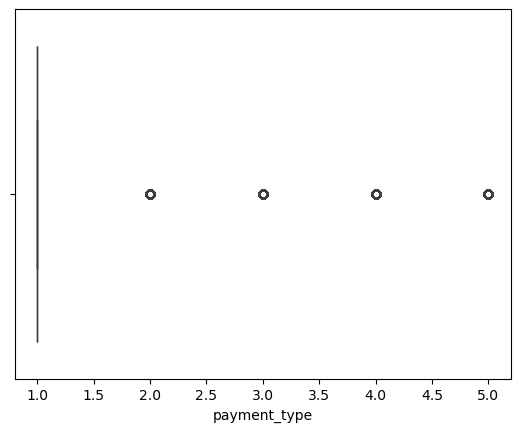

In [343]:
# Continue with outlier handling
sns.boxplot(data=df, x='payment_type')
plt.show()

In [345]:
sns.boxplot(data=df[df['payment_type'] < 2], x='payment_type')
plt.show()

In [347]:
df['payment_type'].value_counts().sort_index()

payment_type
1    209082
2     44470
3      1211
4      1897
5      8828
Name: count, dtype: int64

#### `trip_distance` outlier treatment 

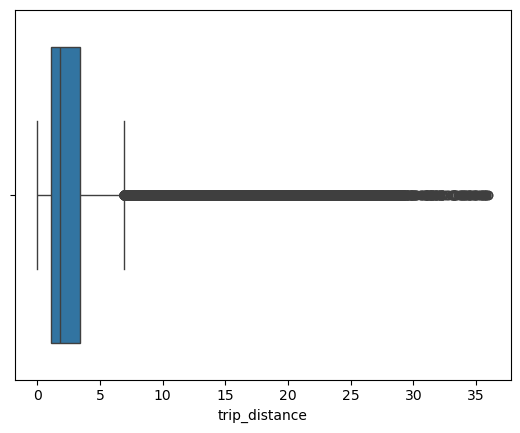

In [350]:
sns.boxplot(data=df[df['trip_distance'] < 36], x='trip_distance')
plt.show()


In [352]:
df[df['trip_distance'] > 30].shape

(252, 30)

In [301]:
df[df['trip_distance'] > 30][['trip_distance','fare_amount']]

trip_distance  fare_amount
225             37.05       157.40
1695            37.90       159.50
3234            42.23       190.00
3616            33.32       132.50
4636            36.51       193.40
5912            34.14       144.10
6849            31.80        67.20
8336            45.70       189.60
9103            53.20         0.00
10000           36.09        70.00
10314           37.38       153.90
11597           37.02       150.70
12360           33.00       200.00
16231           31.80       146.20
16803           31.00       128.00
16846           36.70       151.10
17480           31.86       115.70
17780           55.27       320.10
18605           34.40       124.80
21522           35.00        70.00
21819           57.05       300.00
23247           49.20       213.00
23461           34.14       173.80
24129           47.70       313.10
25530           33.80        70.00
26265           59.97       236.50
26973           39.88       240.30
28510           31.54       148.30
29792           43.32       225.00
30806           65.05       353.00
32903           35.50       323.60
33126           30.12       125.50
34978           31.34       139.50
35565           41.80       187.10
36854           30.12       171.00
38123           37.50       182.20
38206           53.60       170.00
40252           31.00       113.60
40683           39.00       161.60
41708           32.79       126.20
43210           30.18        70.00
44530           44.28       261.30
47953           36.49       151.10
48729           34.45       131.80
48896           39.52       259.90
51330           33.09       130.00
52094           75.50       269.70
52148           30.20        62.50
52860           32.40       160.20
55444           31.10       113.60
55906           30.32        84.20
57219           46.11        70.00
59524           30.70        71.50
60226           33.89       214.40
60948           40.65       194.00
62083           32.14       139.50
62116           44.30       150.00
62168           32.77        80.00
63405           33.24        70.00
64291           43.33       228.40
65805           31.30       137.10
67153           30.90        70.00
67299           35.40        62.50
68861           33.40       140.20
70835           31.34       129.00
72601           34.62       120.00
73947           38.03       171.40
75030           30.80       122.00
75897           54.45       332.70
77239           33.41       200.00
77509           32.50       144.10
78205           38.13       231.20
80101           56.50       250.00
82712           56.20       351.60
83797           41.54       213.00
84863          187.35       180.00
85207           35.98       157.00
86966           42.29       210.00
88170           53.32       400.60
89113           64.49        70.00
89265           31.50       118.50
89613           45.20       171.70
89648           32.08       117.80
91484           33.16       141.60
91701           35.77       202.50
92276           60.33       220.00
93178           32.11       157.00
93603           39.71       196.90
95445           34.90         0.00
97963           33.10       144.10
98158           60.67       237.20
99154           35.69       156.70
99497           31.30       139.90
99867           31.51       126.20
103353          33.80       218.60
103488          33.25       200.00
108740          31.07        70.00
110522          31.20        70.00
111651          31.41       160.00
112935          37.48       159.50
113385          51.54       365.60
114365          36.27       151.80
116087          49.55       303.30
119324          43.06       258.50
121762          37.76       199.00
123066          30.90        70.00
123417          30.54       113.60
124524          33.28       170.00
124733          33.97        95.03
125649       22528.82        17.42
126888          35.93       151.80
129049          31.56       131.00
130452          38.06       203.90
131842          36

In [354]:
# Remoed the records wahre trip_distance is geater than 30
df = df[df['trip_distance'] <= 30]

In [305]:
sns.boxplot(df, x='trip_distance')
plt.show()

In [234]:
df[(df['trip_distance'] > 10) & (df['fare_amount'] > 100)].fare_amount.mean()

140.6176610644258

In [238]:
df[(df['trip_distance'] > 10) & (df['fare_amount'] > 100)].trip_distance.mean()

27.715280112044816

In [240]:
df['trip_distance'].mean()

3.4405375191972767

In [248]:
df[(df['trip_distance'] > 10)].trip_distance.mean()

16.065258510309505

In [242]:
df[(df['trip_distance'] > 10)].fare_amount.mean()

65.1852170073734

In [360]:
df[df['trip_distance'] == 0].describe()

VendorID           tpep_pickup_datetime  \
count  5237.000000                           5237   
mean      1.394310  2023-08-04 14:48:15.948252672   
min       1.000000            2023-01-01 00:45:06   
25%       1.000000            2023-05-12 19:39:24   
50%       1.000000            2023-09-03 18:26:08   
75%       2.000000            2023-10-28 14:38:15   
max       2.000000            2023-12-31 22:50:44   
std       0.488749                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                           5237      5237.000000         5237.0   
mean   2023-08-04 15:00:05.451021824         1.200306            0.0   
min              2023-01-01 00:54:06         1.000000            0.0   
25%              2023-05-12 19:40:24         1.000000            0.0   
50%              2023-09-03 18:31:59         1.000000            0.0   
75%              2023-10-28 14:59:46         1.000000            0.0   
max              2023-12-31 23:01:23         6.000000            0.0   
std                              NaN         0.634036            0.0   

        RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  \
count  5237.000000   5237.000000   5237.000000   5237.000000  5237.000000   
mean      1.647317    162.426198    164.017185      2.973076    26.616746   
min       1.000000      1.000000      1.000000      1.000000     0.000000   
25%       1.000000    114.000000    114.000000      1.000000     7.900000   
50%       1.000000    161.000000    162.000000      2.000000    16.980000   
75%       1.000000    233.000000    234.000000      5.000000    30.500000   
max       5.000000    265.000000    265.000000      5.000000   910.000000   
std       1.404157     70.267315     72.040791      1.779971    34.226157   

             extra   tip_amount  tolls_amount  total_amount  \
count  5237.000000  5237.000000   5237.000000   5237.000000   
mean      0.570852     2.071818      0.485578     32.687269   
min       0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000      0.000000     13.000000   
50%       0.000000     0.000000      0.000000     21.610000   
75%       0.000000     0.010000      0.000000     36.390000   
max       9.250000    75.880000    143.000000    911.000000   
std       1.314816     5.720621      2.736362     37.452532   

       congestion_surcharge  pickup_month   pickup_day  pickup_hour  \
count           5237.000000   5237.000000  5237.000000  5237.000000   
mean               1.677964      7.607027    15.790720    13.472408   
min                0.000000      1.000000     1.000000     0.000000   
25%                0.000000      5.000000     9.000000     9.000000   
50%                2.500000      9.000000    16.000000    15.000000   
75%                2.500000     10.000000    23.000000    19.000000   
max                2.500000     12.000000    31.000000    23.000000   
std                1.174568      3.371375     8.660548     6.513359   

       airport_fees  pickup_mins  dropoff_month  dropoff_day  dropoff_hour  \
count   5237.000000  5237.000000    5237.000000  5237.000000   5237.000000   
mean       0.091751    29.390300       7.607218    15.793966     13.445866   
min        0.000000     0.000000       1.000000     1.000000      0.000000   
25%        0.000000    14.000000       5.000000     9.000000      9.000000   
50%        0.000000    29.000000       9.000000    16.000000     15.000000   
75%        0.000000    44.000000      10.000000    23.000000     19.000000   
max        1.750000    59.000000      12.000000    31.000000     23.000000   
std        0.378448    17.236881       3.371595     8.660659      6.592932   

       dropoff_mins  trip_time_mins  
count   5237.000000     5237.000000  
mean      29.883330       11.825003  
min        0.000000        0.000000  
25%       15.000000        0.280000  
50%       30.000000        7.930000  
75%       45.000000       17.800000  
max       59

In [362]:
df = df[df['trip_distance'] != 0]

In [364]:
df[df['trip_time_mins'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
18169          1  2023-01-26 08:54:55   2023-01-26 08:54:55              1.0   
67740          2  2023-11-28 13:22:42   2023-11-28 13:22:42              1.0   
96691          2  2023-03-03 09:41:00   2023-03-03 09:41:00              1.0   
126426         1  2023-06-14 08:17:32   2023-06-14 08:17:32              1.0   
135724         1  2023-06-26 15:48:26   2023-06-26 15:48:26              1.0   
171662         1  2023-02-22 07:53:19   2023-02-22 07:53:19              1.0   
172239         1  2023-02-22 15:52:07   2023-02-22 15:52:07              1.0   
188905         1  2023-04-13 09:18:02   2023-04-13 09:18:02              1.0   
226779         2  2023-07-30 20:48:12   2023-07-30 20:48:12              1.0   
235048         2  2023-07-15 06:51:00   2023-07-15 06:51:00              1.0   
236311         1  2023-07-31 10:57:21   2023-07-31 10:57:21              1.0   
250681         1  2023-09-08 11:06:28   2023-09-08 11:06:28              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
18169            7.80         1.0                  N           244   
67740            0.05         5.0                  N           264   
96691            0.01         1.0                  N           138   
126426           0.70         1.0                  N           164   
135724           2.80         1.0                  N           239   
171662           1.30         1.0                  N           237   
172239           1.00         1.0                  N           238   
188905           2.70         1.0                  N           236   
226779           0.10         2.0                  N           141   
235048           0.03         1.0                  N           246   
236311           2.30         1.0                  N           237   
250681           0.60         1.0                  N           237   

        DOLocationID  payment_type  fare_amount  extra  tip_amount  \
18169            244             1        37.30    2.5        8.25   
67740            264             1        83.00    0.0       16.60   
96691            138             5        39.46    0.0        8.19   
126426           164             3         3.00    2.5        0.00   
135724           239             2        17.70    2.5        0.00   
171662           237             1        10.70    2.5        2.90   
172239           238             1         9.30    2.5        1.00   
188905           236             1        15.60    2.5        0.00   
226779           264             1        70.00    0.0       14.30   
235048           246             5        14.67    0.0        2.80   
236311           237             2        17.00    2.5        0.00   
250681           237             1         7.20    2.5        2.20   

        tolls_amount  total_amount  congestion_surcharge pickup_date  \
18169            0.0         49.55                   2.5  2023-01-26   
67740            0.0         99.60                   0.0  2023-11-28   
96691            0.0         49.15                   2.5  2023-03-03   
126426           0.0          7.00                   2.5  2023-06-14   
135724           0.0         21.70                   2.5  2023-06-26   
171662           0.0         17.60                   2.5  2023-02-22   
172239           0.0         14.30                   2.5  2023-02-22   
188905           0.0         19.60                   2.5  2023-04-13   
226779           0.0         85.80                   0.0  2023-07-30   
235048           0.0         21.47                   2.5  2023-07-15   
236311           0.0         21.00                   2.5  2023-07-31   
250681           0.0         13.40                   2.5  2023-09-08   

        pickup_month  pickup_day pickup_time  pickup_hour  airport_fees  \
18169              1          26    08:54:55            8           0.0   
67740             11          28    13:22:42           13 

In [368]:
# df[(df['trip_distance'] == 0) & (df['fare_amount'] >150)][['fare_amount','trip_time_mins']].shape

In [372]:
# df[(df['trip_distance'] == 0)][['fare_amount','trip_time_mins']].shape

In [374]:
# df = df[(df['trip_distance'] != 0) & (df['trip_time_mins'] >4)]
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  
0            1     00:44:17             0            44           12.45  
1            1     00:24:12             0            24           13.37  
2            1     00:34:52             0            34            9.25  
3            1     00:52:20             0            52           24.90  
4            1     01:23:15             1            23           24.00

#### `fare_amount` outlier treatment 


In [377]:
sns.boxplot(data=df, x='fare_amount')
plt.show()

In [381]:
df[df['fare_amount'] > 100].shape

(528, 30)

In [383]:
df[df['fare_amount'] > 150].trip_time_mins.value_counts().sort_index()

trip_time_mins
0.03      1
0.15      1
0.50      1
0.88      1
1.78      1
5.77      1
7.40      1
17.73     1
18.03     1
30.07     1
31.52     1
33.38     1
33.77     1
34.55     1
39.40     1
39.80     1
40.98     1
41.53     1
42.60     1
43.07     1
43.72     1
44.07     1
45.32     1
45.47     1
46.68     1
50.20     1
50.73     1
51.45     1
52.03     1
54.10     1
54.98     1
56.12     1
57.80     1
58.17     1
61.12     1
64.77     1
64.92     1
65.50     1
66.95     1
72.07     1
72.65     1
76.10     1
76.78     1
78.33     1
89.50     1
95.25     1
102.40    1
220.55    1
276.82    1
Name: count, dtype: int64

In [385]:
df[df['fare_amount'] <= 150].shape

(259950, 30)

In [391]:
df[df['fare_amount'] > 100].describe()

VendorID           tpep_pickup_datetime  \
count  528.000000                            528   
mean     1.852273  2023-07-17 10:02:12.441287936   
min      1.000000            2023-01-01 00:17:43   
25%      2.000000  2023-04-28 19:47:01.750000128   
50%      2.000000     2023-07-15 05:55:14.500000   
75%      2.000000  2023-10-10 21:13:48.249999872   
max      2.000000            2023-12-31 16:07:06   
std      0.355166                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                            528       528.000000     528.000000   
mean   2023-07-17 10:58:12.441287936         1.535985      21.471042   
min              2023-01-01 01:03:15         1.000000       0.010000   
25%    2023-04-28 20:32:08.750000128         1.000000      18.900000   
50%       2023-07-15 06:36:40.500000         1.000000      22.200000   
75%    2023-10-10 22:16:18.750000128         2.000000      26.135000   
max              2023-12-31 16:50:59         6.000000      29.940000   
std                              NaN         0.937634       6.321974   

       RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  \
count  528.000000    528.000000    528.000000    528.000000   528.000000   
mean     3.242424    150.943182    160.708333      1.310606   121.341307   
min      1.000000      1.000000      1.000000      1.000000   100.300000   
25%      3.000000    132.000000      1.000000      1.000000   104.500000   
50%      4.000000    132.000000    245.000000      1.000000   112.900000   
75%      4.000000    163.000000    265.000000      2.000000   129.100000   
max      5.000000    265.000000    265.000000      5.000000   325.000000   
std      1.414864     49.579337    118.570399      0.632846    26.835027   

            extra  tip_amount  tolls_amount  total_amount  \
count  528.000000  528.000000    528.000000    528.000000   
mean     1.366951   15.253958      9.433011    149.654318   
min      0.000000    0.000000      0.000000    102.800000   
25%      0.000000    0.000000      0.000000    127.952500   
50%      0.000000   15.000000      6.940000    143.670000   
75%      2.500000   25.860000     17.812500    163.075000   
max      9.250000   60.200000     44.250000    361.200000   
std      2.044960   13.847730      9.352252     33.450226   

       congestion_surcharge  pickup_month  pickup_day  pickup_hour  \
count            528.000000    528.000000  528.000000   528.000000   
mean               0.350379      6.992424   16.380682    14.363636   
min                0.000000      1.000000    1.000000     0.000000   
25%                0.000000      4.000000    9.000000    11.000000   
50%                0.000000      7.000000   16.000000    15.000000   
75%                0.000000     10.000000   24.000000    18.000000   
max                2.500000     12.000000   31.000000    23.000000   
std                0.868683      3.277770    8.759975     5.311579   

       airport_fees  pickup_mins  dropoff_month  dropoff_day  dropoff_hour  \
count    528.000000   528.000000     528.000000   528.000000     528.00000   
mean       0.830966    28.996212       6.994318    16.352273      14.55303   
min        0.000000     0.000000       1.000000     1.000000       0.00000   
25%        0.000000    14.000000       4.000000     9.000000      12.00000   
50%        1.250000    30.000000       7.000000    16.000000      16.00000   
75%        1.750000    44.000000      10.000000    24.000000      18.00000   
max        1.750000    59.000000      12.000000    31.000000      23.00000   
std        0.840141    17.274763       3.278063     8.754557       5.73688   

       dropoff_mins  trip_time_mins  
count    528.000000      528.000000  
mean      30.007576       56.000000  
min        0.000000        0.030000  
25%       15.750000       39.217500  
50%       30.000000       52.825000  
75%       44.000000       68.592500  
max       59.000000      276.820000  
std       17.12383

### Note ###
- excluding all applicaitons which are having `fare_amount` greaterthan 100

In [393]:
df = df[df['fare_amount'] <= 100]

In [395]:
# Do any columns need standardising?
df['fare_amount'].describe()


count    259471.000000
mean         19.342609
std          16.245957
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         100.000000
Name: fare_amount, dtype: float64

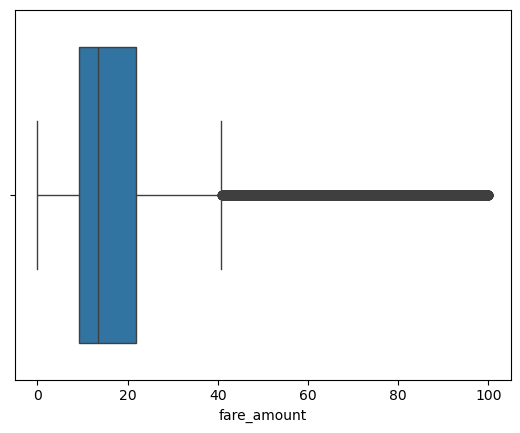

In [397]:
sns.boxplot(data=df, x='fare_amount')
plt.show()

In [401]:
df[df['fare_amount'] == 0].shape

(51, 30)

In [405]:
df = df[df['fare_amount'] != 0]

In [403]:
df[df['total_amount'] == 0].shape

(9, 30)

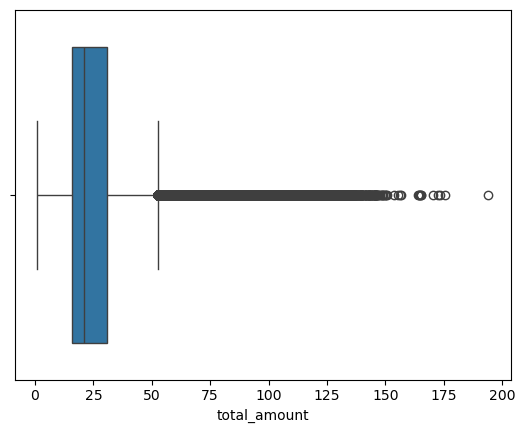

In [407]:
sns.boxplot(data=df, x='total_amount')
plt.show()

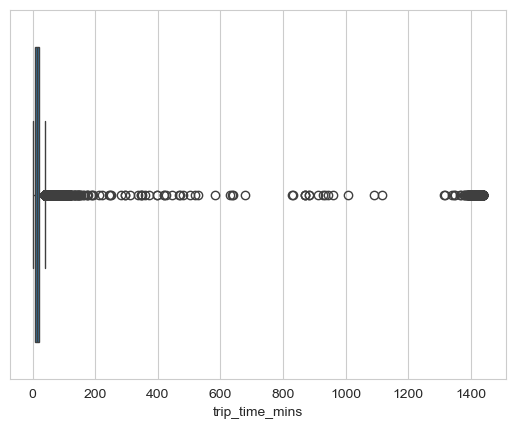

In [528]:
sns.boxplot(data=df, x='trip_time_mins')
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [409]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_month',
 'pickup_day',
 'pickup_time',
 'pickup_hour',
 'airport_fees',
 'pickup_mins',
 'dropoff_date',
 'dropoff_month',
 'dropoff_day',
 'dropoff_time',
 'dropoff_hour',
 'dropoff_mins',
 'trip_time_mins']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`:Numerical
* `improvement_surcharge`:Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

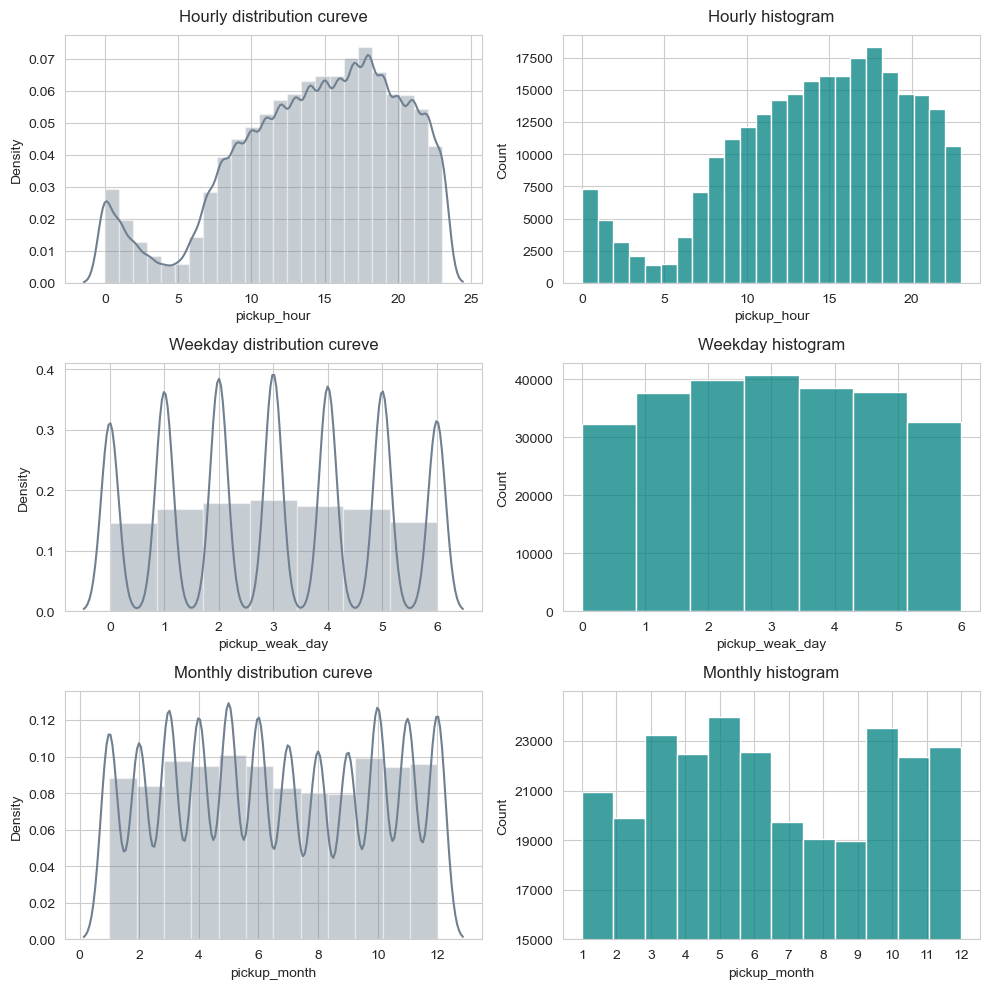

In [503]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 10 

# Find and show the hourly trends in taxi pickups
sns.set_style("whitegrid")

fig, ax= plt.subplots(3,2,figsize=(10,10))
sns.distplot(df['pickup_hour'], bins=24,ax=ax[0,0], color='slategray')
ax[0,0].set_title('Hourly distribution cureve')
sns.histplot(df['pickup_hour'], bins=24,ax=ax[0,1], color='teal')
ax[0,1].set_title('Hourly histogram')

sns.distplot(df['pickup_weak_day'], bins=7,ax=ax[1,0], color='slategray')
ax[1,0].set_title('Weekday distribution cureve')
sns.histplot(df['pickup_weak_day'], bins=7,ax=ax[1,1], color='teal')
ax[1,1].set_title('Weekday histogram')

sns.distplot(df['pickup_month'], bins=12,ax=ax[2,0], color='slategray')
ax[2,0].set_title('Monthly distribution cureve')
sns.histplot(df['pickup_month'], bins=12,ax=ax[2,1], color='teal')
xticks = np.arange(1, 13, 1)
yticks = np.arange(15000, 25000, 2000)
ax[2,1].set_ylim([15000,25000])
ax[2,1].set_xticks(xticks)
ax[2,1].set_yticks(yticks)
ax[2,1].set_title('Monthly histogram')

fig.tight_layout()

# fig.suptitle('Pick UP Distribution - Hourly, weekday & Monthly', fontsize=15)
plt.show()



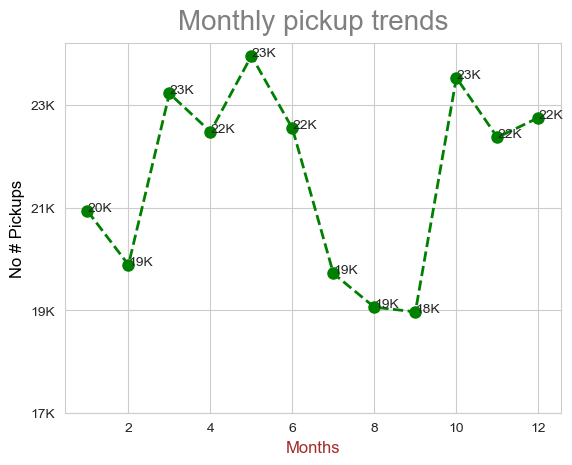

In [506]:
# Show the monthly trends in pickups
pick_M = df['pickup_month'].value_counts().sort_index().reset_index()
plt.plot(pick_M['pickup_month'],pick_M['count'],'go--', linewidth=2, markersize=8)
# Adding and formatting title
plt.title("Monthly pickup trends", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'grey'})

# Labeling Axes
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("No # Pickups", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'} )

ticks = np.arange(17000, 25000, 2000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)

# plt.xticks(rotation=90)

for xy in zip(pick_M['pickup_month'],pick_M['count']):
    plt.annotate(text = "{}K".format(xy[1]//1000), xy = xy,  textcoords='data')


plt.show()

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [508]:
# Analyse the above parameters
df[['fare_amount','tip_amount','total_amount','trip_distance']].describe()


fare_amount     tip_amount   total_amount  trip_distance
count  259420.000000  259420.000000  259420.000000  259420.000000
mean       19.346411       3.541468      28.407669       3.439566
std        16.245290       3.846705      20.809483       4.302208
min         0.010000       0.000000       1.010000       0.010000
25%         9.300000       1.000000      16.000000       1.100000
50%        13.500000       2.860000      21.000000       1.810000
75%        21.900000       4.450000      30.600000       3.440000
max       100.000000     150.290000     194.100000      29.940000

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [130]:
df.shape

(244395, 30)

In [512]:
for i in ['fare_amount','tip_amount','total_amount','trip_distance']:
    total = df.shape[0]
    zero_records = df[df[i] == 0].shape[0]
    zero_pct = round((zero_records/total) * 100, 6)
    print('attribute {i} has zero value percentage of '.format(i=i), str(zero_pct) + '%')

attribute fare_amount has zero value percentage of  0.0%
attribute tip_amount has zero value percentage of  21.874566%
attribute total_amount has zero value percentage of  0.0%
attribute trip_distance has zero value percentage of  0.0%


In [514]:
df[(df['fare_amount'] == 0) |(df['total_amount'] == 0) |(df['trip_distance'] == 0) ].shape

(0, 31)

In [526]:
df[df['trip_distance'] < 1].trip_time_mins.value_counts().sort_index()

trip_time_mins
0.00        6
0.02        1
0.03        2
0.05       10
0.07       16
           ..
1436.00     1
1436.02     2
1436.83     1
1437.72     1
1438.58     1
Name: count, Length: 1588, dtype: int64

**Note**
-we can exclude but in my sample i am loosing almost **21%** of data. so i am not excluding those values

In [140]:
# Create a df with non zero entries for the selected parameters.
df[(df['trip_distance'] > 0) & (df['trip_distance'] <1 )] [['trip_distance','fare_amount','trip_time_mins']].describe()
# df[(df['trip_distance'] > 0) & (df['trip_distance'] <1 )] ['trip_time_mins'].value_counts().sort_index()


trip_distance   fare_amount  trip_time_mins
count   39542.000000  39542.000000    39542.000000
mean        0.744820      8.421653        8.615263
std         0.169711      3.432318       39.715441
min         0.010000      0.000000        4.020000
25%         0.630000      6.500000        5.130000
50%         0.780000      7.900000        6.400000
75%         0.890000      9.300000        8.530000
max         0.990000    120.000000     1438.580000

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [530]:
# Group data by month and analyse monthly revenue

monthly_income = df.groupby(['pickup_month'])['total_amount'].sum().reset_index()
monthly_income

pickup_month  total_amount
0              1     567208.16
1              2     539336.11
2              3     646924.36
3              4     628993.81
4              5     692673.95
5              6     653024.73
6              7     559286.52
7              8     541440.22
8              9     563842.10
9             10     691305.59
10            11     638619.43
11            12     646862.56

In [532]:
plt.plot(monthly_income['pickup_month'],monthly_income['total_amount'],'b--', linewidth=2, markersize=4,marker='o')
# Adding and formatting title
plt.title("Monthly Total Amount trends", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'grey'})

# Labeling Axes
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'} )

ticks = np.arange(500000, 700000, 100000)
labels = ["{}K".format(i//100000) for i in ticks]
plt.yticks(ticks, labels)

# plt.xticks(rotation=90)

for xy in zip(monthly_income['pickup_month'],monthly_income['total_amount']):
    plt.annotate(text = "{}K".format(xy[1]//1000), xy = xy,  textcoords='data')


plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [534]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')


In [540]:
df['quarter'].value_counts().sort_index()

quarter
2001Q1        1
2023Q1    64043
2023Q2    68981
2023Q3    57740
2023Q4    68654
2024Q1        1
Freq: Q-DEC, Name: count, dtype: int64

In [536]:
df['quarter'].unique()

<PeriodArray>
['2023Q1', '2023Q4', '2024Q1', '2001Q1', '2023Q2', '2023Q3']
Length: 6, dtype: period[Q-DEC]

In [542]:
df = df[~(df['quarter'] == '2001Q1')]
df = df[~(df['quarter'] == '2024Q1')]

In [546]:
quarter_income = df.groupby(['quarter'])['total_amount'].sum().reset_index()
quarter_income

quarter  total_amount
0  2023Q1    1753410.23
1  2023Q2    1974692.49
2  2023Q3    1664568.84
3  2023Q4    1976787.58

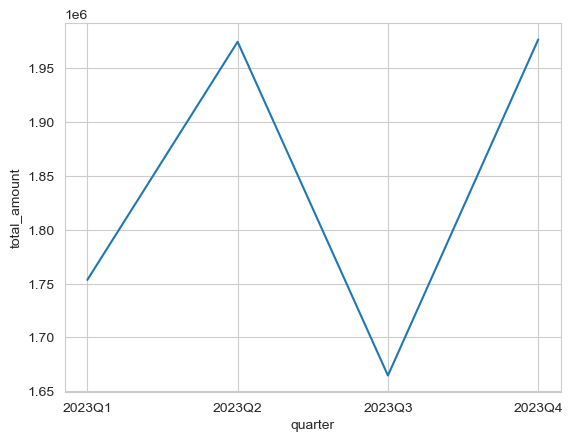

In [558]:
sns.lineplot(data=quarter_income,x=quarter_income['quarter'].astype('str'),y=quarter_income['total_amount'])
plt.show()

In [586]:
# plt.plot(quarter_income['quarter'].astype(str),quarter_income['total_amount'],'b--', linewidth=2, markersize=4,marker='o')
# sns.bar(data=quarter_income,x=quarter_income['quarter'].astype('str'),y=quarter_income['total_amount'])
plt.plot(quarter_income['quarter'].astype('str'),quarter_income['total_amount'])
# Adding and formatting title
plt.title("Quarterly Total Amount trends", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'grey'})

# Labeling Axes
plt.xlabel("Quarter", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'} )

ticks = np.arange(1600000, 2000000, 100000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)

# plt.xticks(rotation=90)

for xy in zip(quarter_income['quarter'].astype('str'),quarter_income['total_amount']):
    plt.annotate(text = "{}K".format(float(xy[1]//1000)), xy = xy,  textcoords='data')


plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: ylabel='Frequency'>

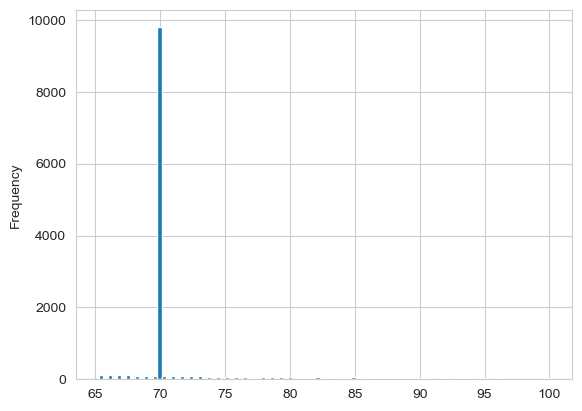

In [604]:
df[df['fare_amount'] > 65]['fare_amount'].plot(kind='hist', bins=100)

In [610]:
df[df['fare_amount'] == 70].head(100)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
20           2  2023-01-01 00:42:41   2023-01-01 01:17:18              1.0   
41           2  2023-01-01 23:26:21   2023-01-01 23:53:51              2.0   
81           1  2023-01-01 01:52:27   2023-01-01 02:13:49              3.0   
104          2  2023-01-01 14:44:13   2023-01-01 15:48:58              5.0   
118          2  2023-01-01 14:46:48   2023-01-01 15:30:36              1.0   
123          2  2023-01-01 22:34:28   2023-01-01 23:01:04              1.0   
186          2  2023-01-01 15:27:17   2023-01-01 16:30:57              2.0   
191          2  2023-01-01 15:54:34   2023-01-01 16:47:24              1.0   
205          2  2023-01-01 17:38:42   2023-01-01 18:19:00              2.0   
297          2  2023-01-01 05:24:03   2023-01-01 05:47:06              4.0   
305          2  2023-01-01 06:28:27   2023-01-01 06:52:44              1.0   
311          1  2023-01-01 21:39:45   2023-01-01 22:05:09              1.0   
322          1  2023-01-01 21:53:03   2023-01-01 22:35:14              1.0   
328          1  2023-01-01 07:10:45   2023-01-01 07:42:40              2.0   
329          2  2023-01-01 07:08:14   2023-01-01 07:40:15              2.0   
333          2  2023-01-01 07:10:47   2023-01-01 07:41:06              2.0   
342          1  2023-01-01 08:56:11   2023-01-01 09:21:25              2.0   
362          1  2023-01-01 19:12:39   2023-01-01 19:51:41              1.0   
363          2  2023-01-01 19:55:25   2023-01-01 20:33:16              1.0   
365          2  2023-01-01 19:43:26   2023-01-01 20:26:06              1.0   
379          1  2023-01-01 10:24:18   2023-01-01 10:48:19              1.0   
416          2  2023-01-01 11:09:11   2023-01-01 11:38:15              2.0   
424          2  2023-01-01 12:39:55   2023-01-01 12:43:59              1.0   
462          2  2023-01-01 13:20:10   2023-01-01 13:52:47              1.0   
464          2  2023-01-01 13:10:10   2023-01-01 13:38:47              2.0   
482          2  2023-01-01 16:40:39   2023-01-01 17:31:27              1.0   
487          2  2023-01-01 16:48:38   2023-01-01 18:03:52              1.0   
532          2  2023-01-31 00:23:50   2023-01-31 01:01:47              1.0   
535          2  2023-01-31 00:17:17   2023-01-31 00:48:58              1.0   
548          2  2023-01-31 23:29:05   2023-02-01 00:14:26              1.0   
655          2  2023-01-31 15:01:32   2023-01-31 15:58:19              1.0   
662          2  2023-01-31 15:17:27   2023-01-31 16:01:47              1.0   
730          2  2023-01-31 17:41:51   2023-01-31 18:41:25              2.0   
733          1  2023-01-31 04:34:35   2023-01-31 05:10:54              3.0   
758          2  2023-01-31 20:36:29   2023-01-31 21:03:30              5.0   
780          2  2023-01-31 05:35:48   2023-01-31 05:55:10              1.0   
865          2  2023-01-31 07:24:06   2023-01-31 08:31:51              1.0   
1015         1  2023-01-31 10:02:01   2023-01-31 11:04:31              1.0   
1042         1  2023-01-31 11:31:27   2023-01-31 12:27:13              1.0   
1121         2  2023-01-31 13:48:17   2023-01-31 14:35:48              1.0   
1144         1  2023-01-31 16:11:17   2023-01-31 17:05:09              1.0   
1197         2  2023-01-31 18:14:55   2023-01-31 19:03:23              1.0   
1250         2  2023-01-24 23:19:21   2023-01-24 23:54:08              1.0   
1263         2  2023-01-24 14:06:56   2023-01-24 15:18:27              1.0   
1274         2  2023-01-24 14:13:04   2023-01-24 15:06:43              2.0   
1280         1  2023-01-24 14:40:29   2023-01-24 15:39:35              1.0   
1425         2  2023-01-24 17:47:23   2023-01-24 18:23:19              2.0   
1450         1  2023-01-24 20:55:31   2023-01-24 21:30:19              1.0   
1623         2  2023-01-24 19:27:48   2023-01-24 20:01:17              1.0   
1626         2  2023-01-24 19:41:34   2023-01-24 20:17:21              1.0   
1665         2  2023-01-24 0

In [612]:
df[df['fare_amount'] == 70].PULocationID.value_counts()

PULocationID
132    7190
230     269
161     169
170     115
162     113
163     111
164      94
233      86
264      85
48       82
100      69
186      68
107      59
68       59
142      58
236      52
237      47
239      45
234      43
229      41
10       38
263      37
262      37
140      37
90       35
141      34
261      33
79       33
238      33
13       32
87       31
75       30
145      28
43       26
158      25
113      25
231      24
151      23
138      21
246      21
148      20
215      20
125      18
93       16
137      16
249      16
144      15
143      15
130      13
211      13
24       11
114      10
50        9
219       9
166       9
88        9
209       9
45        7
56        6
226       6
28        6
223       6
82        6
224       5
157       5
232       5
70        5
41        5
197       5
134       4
129       2
4         2
216       2
65        2
260       2
116       2
193       2
80        2
152       1
194       1
95        1
202       1
89 

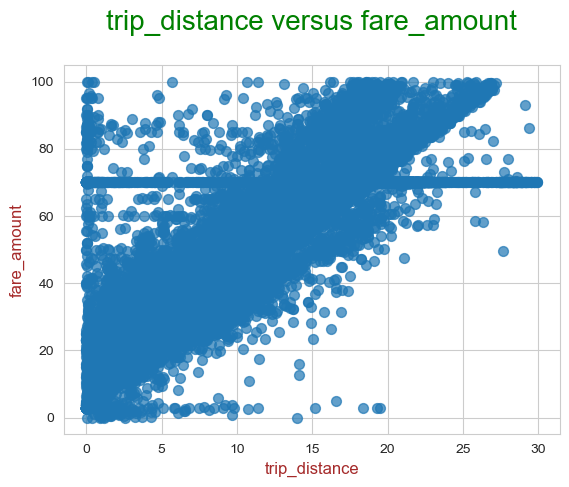

In [596]:
# Show how trip fare is affected by distance
# Show how trip fare is affected by distance
from matplotlib import rcParams
rcParams['axes.titlepad'] = 25 
# plt.scatter(df[df['trip_distance']<60]['trip_distance'], df[df['trip_distance']<60]['fare_amount'], alpha= 0.7, s = 50 )
plt.scatter(df['trip_distance'], df['fare_amount'], alpha= 0.7, s = 50 , cmap='plasma')

# Adding and formatting title
plt.title("trip_distance versus fare_amount", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("trip_distance", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("fare_amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()


In [614]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['trip_distance'], df['fare_amount'])
print('Correlation between trip_distance and fare_amount is "', correlation,'"')

Correlation between trip_distance and fare_amount is " 0.9515295638258502 "


In [616]:
# correlation, p_value = pearsonr(df[df['trip_distance']<60]['trip_distance'], df[df['trip_distance']<60]['fare_amount'])
# print('Correlation between trip_distance and fare_amount is "', correlation,'"')

In [620]:
df.to_csv('intermediate_data_1.csv',index=False)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [641]:
df = pd.read_csv('intermediate_data_1.csv')

In [645]:
df[df['trip_time_mins'] > 150].shape

(245, 32)

In [647]:
df = df[df['trip_time_mins'] <= 150]
df.shape

(259173, 32)

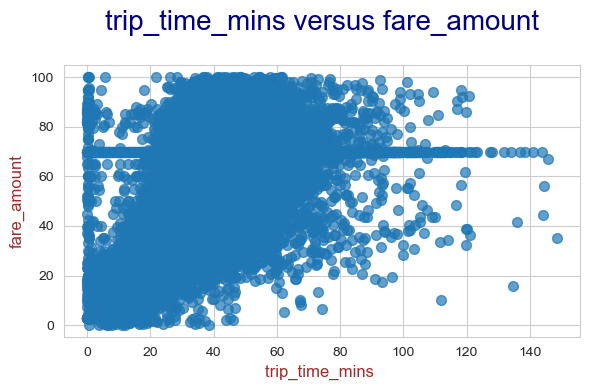

In [649]:
# Show relationship between fare and trip duration

rcParams['axes.titlepad'] = 25 
plt.figure(figsize=(6,4))
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Show relationship between fare and trip duration
plt.scatter(df['trip_time_mins'],df['fare_amount'], alpha= 0.7, s = 50, cmap='autumn' )

# Adding and formatting title
plt.title("trip_time_mins versus fare_amount", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("trip_time_mins ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("fare_amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()


In [651]:
correlation, p_value = pearsonr(df['fare_amount'], df['trip_time_mins'],)
print('Correlation between trip_distance and fare_amount is "', correlation,'"')

Correlation between trip_distance and fare_amount is " 0.8684146734566304 "


In [638]:
# correlation, p_value = pearsonr(df['fare_amount'], df['trip_time_mins'],)
# print('Correlation between trip_distance and fare_amount is "', correlation,'"')

***Note***
- for analysis purpose not considering the datapoints where trip duration greater than 200min

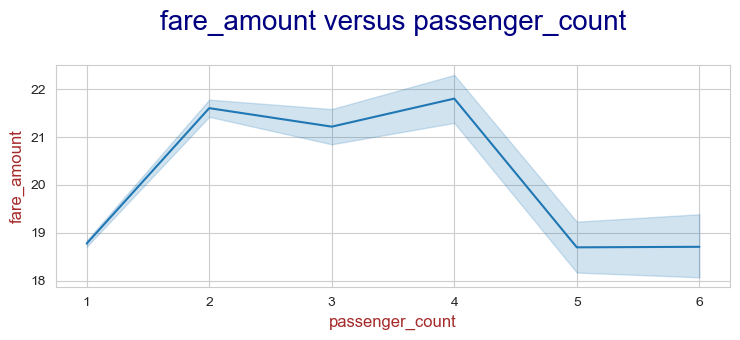

In [653]:
# Show relationship between fare and number of passengers

# plt.bar( df['passenger_count'],df['fare_amount'], alpha= 0.7, s = 50, cmap='autumn' )
sns.lineplot(data=df, x='passenger_count', y='fare_amount',palette='flare')

# Adding and formatting title
plt.title("fare_amount versus passenger_count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("passenger_count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("fare_amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()


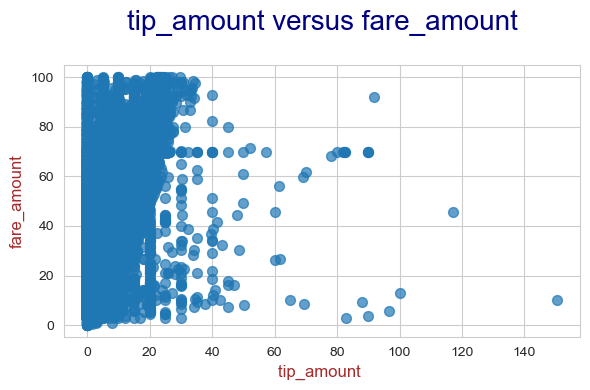

In [663]:
plt.figure(figsize=(6,4))
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Show relationship between fare and trip duration
plt.scatter(df['tip_amount'],df['fare_amount'], alpha= 0.7, s = 50, cmap='autumn' )

# Adding and formatting title
plt.title("tip_amount versus fare_amount", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("tip_amount ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("fare_amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [665]:
correlation, p_value = pearsonr(df['fare_amount'], df['tip_amount'],)
print('Correlation between tip_amount and fare_amount is "', correlation,'"')

Correlation between tip_amount and fare_amount is " 0.6128116096843741 "


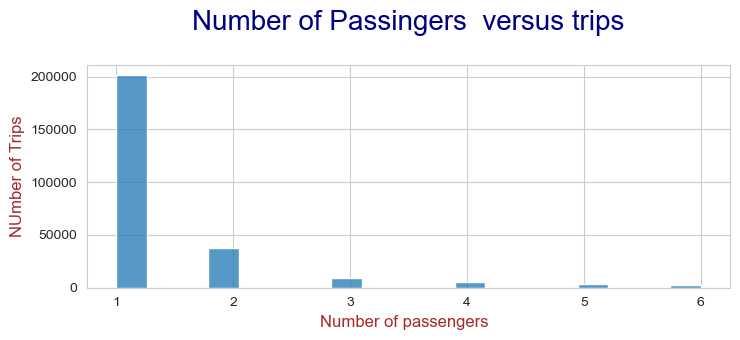

In [675]:
sns.histplot(data=df, x='passenger_count')
# Adding and formatting title
plt.title("Number of Passingers  versus trips", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("Number of passengers  ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("NUmber of Trips", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [655]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'pickup_date', 'pickup_month', 'pickup_day', 'pickup_time',
       'pickup_hour', 'airport_fees', 'pickup_mins', 'dropoff_date',
       'dropoff_month', 'dropoff_day', 'dropoff_time', 'dropoff_hour',
       'dropoff_mins', 'trip_time_mins', 'pickup_weak_day', 'quarter'],
      dtype='object')

In [657]:
monthly_passinger_fare = df.pivot_table(index="pickup_month", columns="passenger_count", values="fare_amount",aggfunc='sum').reset_index(drop=False)
# monthly_passinger_fare.drop(columns='passenger_count',inplace=True)
# monthly_passinger_fare.reset_index(
monthly_passinger_fare.set_index(['pickup_month'], inplace = True)
monthly_passinger_fare

passenger_count        1.0       2.0       3.0       4.0     5.0     6.0
pickup_month                                                            
1                291779.27  61357.51  14387.20   7125.10  4937.3  3564.5
2                278371.85  57678.50  12309.60   6200.30  5289.6  3692.8
3                336152.85  67167.20  18001.10   7189.40  6090.8  3267.8
4                316559.93  70892.80  19132.60  11984.50  5054.8  3962.7
5                358379.50  77262.10  19139.40   8287.98  5386.3  3206.5
6                334096.82  75040.89  17476.60   8924.90  5924.3  3945.4
7                278764.65  65786.05  18914.60  11948.20  4241.5  3312.4
8                272070.57  61238.28  17847.40  10565.40  3956.7  3168.9
9                293509.64  64571.29  12760.19   8256.45  4408.5  3634.1
10               357618.34  77098.79  17205.65   9111.80  5957.1  3236.6
11               330315.43  69162.94  15491.20   8412.20  5290.3  3532.1
12               327406.43  74120.65  18231.10  14203.20  4853.6  3070.1

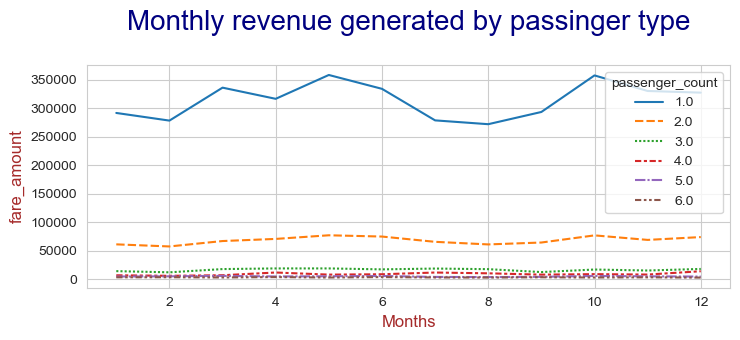

In [677]:
sns.lineplot(data=monthly_passinger_fare)
# Adding and formatting title
plt.title("Monthly revenue generated by passinger type", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("fare_amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [679]:
df['tip_amount'].value_counts()

tip_amount
0.00     56621
2.00     13199
1.00     10263
3.00      6874
5.00      3941
         ...  
23.42        1
23.64        1
10.67        1
50.05        1
22.29        1
Name: count, Length: 2321, dtype: int64

In [681]:
df['trip_distance'].value_counts()

trip_distance
1.00     3636
0.90     3572
0.80     3565
1.10     3556
1.20     3438
         ... 
23.29       1
26.17       1
23.75       1
24.28       1
29.53       1
Name: count, Length: 2591, dtype: int64

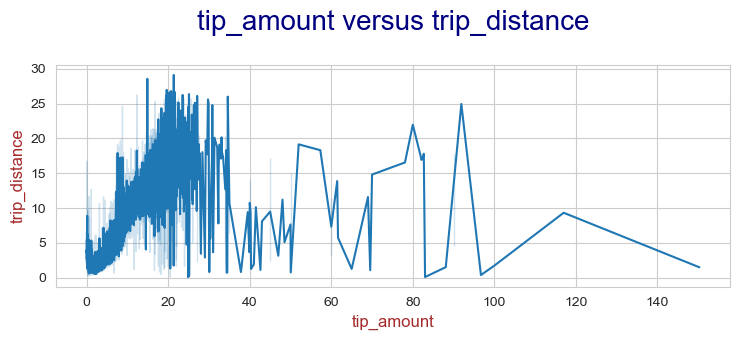

In [684]:
# Show relationship between tip and trip distance

sns.lineplot(data=df, x='tip_amount', y='trip_distance',palette='flare')

# Adding and formatting title
plt.title("tip_amount versus trip_distance", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("tip_amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("trip_distance", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

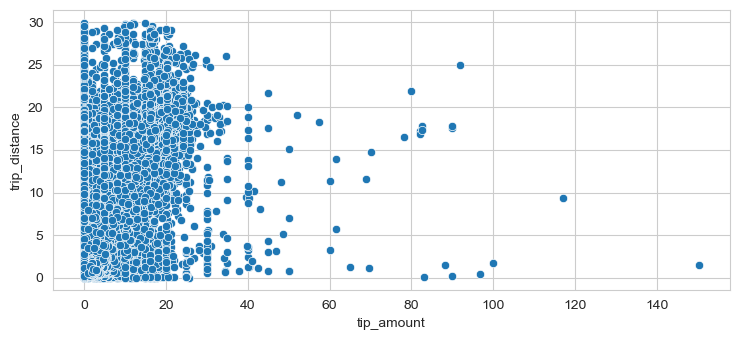

In [685]:
sns.scatterplot(data=df, x='tip_amount', y='trip_distance',palette='flare')
plt.show()

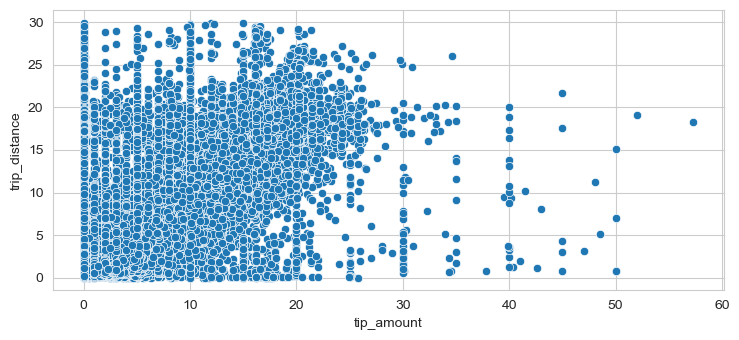

In [688]:
sns.scatterplot(data=df[(df['tip_amount'] < 60) &(df['trip_distance'] < 40) ], x='tip_amount', y='trip_distance',palette='flare')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [690]:
df['payment_type'].value_counts()

payment_type
1    206523
2     43336
5      6733
4      1675
3       906
Name: count, dtype: int64

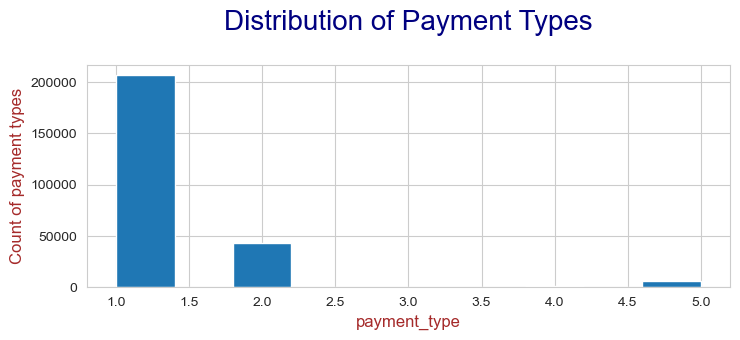

In [699]:
# Analyse the distribution of different payment types (payment_type).
df['payment_type'].plot(kind='hist')
plt.title("Distribution of Payment Types", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'navy'})

# Labeling Axes
plt.xlabel("payment_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count of payment types", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= UnKnown



In [701]:
df.to_csv('intermediate_dataset_2.csv',index=False)

In [9]:
df = pd.read_csv('intermediate_dataset_2.csv')

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [14]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [17]:
# os.chdir(r'C:\Users\Dinesh\ML & AI Learning\EDA_Case_Study\Datasets and Dictionary')

In [19]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\Dinesh\ML & AI Learning\EDA_Case_Study\Datasets and Dictionary\taxi_zones\taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

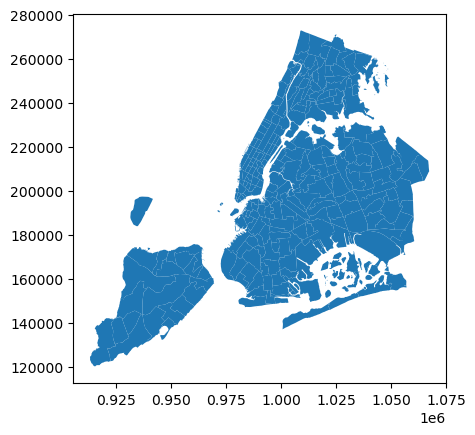

In [22]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [26]:
# Merge zones and trip records using locationID and PULocationID
df_zone = pd.merge(left=df, right=zones, left_on='PULocationID', right_on='LocationID')
df_zone.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  
0  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  POLYGON ((985265.129 208165.863, 985125.733 20...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((989380.305 218980.247, 989359.803 21...  
4  POLYGON ((995735.062 215619.835, 995670.105 21...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [29]:
# Group data by location and calculate the number of trips

df_trips = pd.DataFrame(df_zone.groupby(['LocationID'])['PULocationID'].count().sort_values(ascending=False)).reset_index()
df_trips.rename(columns={'PULocationID':'number_of_trips'},inplace=True)
df_trips.head()


LocationID  number_of_trips
0         132            12933
1         237            12204
2         161            12121
3         236            10960
4         162             9297

In [31]:
df_trips = pd.DataFrame(df_zone.groupby(['LocationID','zone'])['PULocationID'].count().sort_values(ascending=False)).reset_index()
df_trips.rename(columns={'PULocationID':'number_of_trips'},inplace=True)
df_trips.head(232)

LocationID                                 zone  number_of_trips
0           132                          JFK Airport            12933
1           237                Upper East Side South            12204
2           161                       Midtown Center            12121
3           236                Upper East Side North            10960
4           162                         Midtown East             9297
5           138                    LaGuardia Airport             8855
6           186         Penn Station/Madison Sq West             8780
7           230            Times Sq/Theatre District             8594
8           142                  Lincoln Square East             8517
9           170                          Murray Hill             7616
10          163                        Midtown North             7496
11          239                Upper West Side South             7323
12          234                             Union Sq             7000
13           48                         Clinton East             6992
14           68                         East Chelsea             6817
15          141                      Lenox Hill West             6256
16           79                         East Village             6238
17          164                        Midtown South             6001
18          249                         West Village             5832
19          107                             Gramercy             5485
20          140                      Lenox Hill East             5106
21          238                Upper West Side North             5034
22          229        Sutton Place/Turtle Bay North             5020
23          263                       Yorkville West             5000
24           43                         Central Park             4417
25          246            West Chelsea/Hudson Yards             4380
26           90                             Flatiron             4275
27          100                     Garment District             4225
28          113              Greenwich Village North             3566
29          231                 TriBeCa/Civic Center             3506
30          262                       Yorkville East             3448
31          114              Greenwich Village South             3427
32          233                  UN/Turtle Bay South             3233
33          137                             Kips Bay             2947
34          143                  Lincoln Square West             2859
35          148                      Lower East Side             2649
36          144                  Little Italy/NoLiTa             2351
37          158        Meatpacking/West Village West             2241
38          151                     Manhattan Valley             2188
39          211                                 SoHo             1969
40           50                         Clinton West             1661
41           13                    Battery Park City             1535
42           75                    East Harlem South             1532
43          261                   World Trade Center             1387
44           87             Financial District North             1313
45          125                            Hudson Sq             1240
46          166                  Morningside Heights             1214
47           70                        East Elmhurst             1176
48           88             Financial District South              689
49           24                         Bloomingdale              685
50           41                       Central Harlem              569
51           74                    East Harlem North              530
52          209                              Seaport              479
53           45                            Chinatown              367
54          232              Two Bridges/Seward Park              349
55          224       Stuy Town/Peter Cooper Village              325
56            4

In [33]:
df_trips[df_trips['number_of_trips'] > 1000].shape

(48, 3)

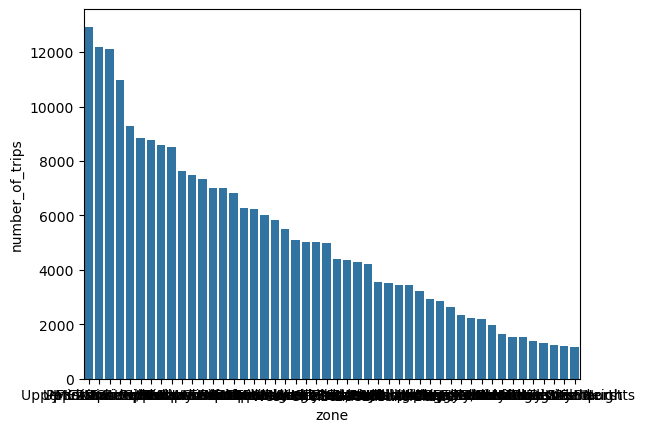

In [35]:
sns.barplot(data=df_trips[df_trips['number_of_trips'] > 1000], x='zone',y='number_of_trips')
plt.show()

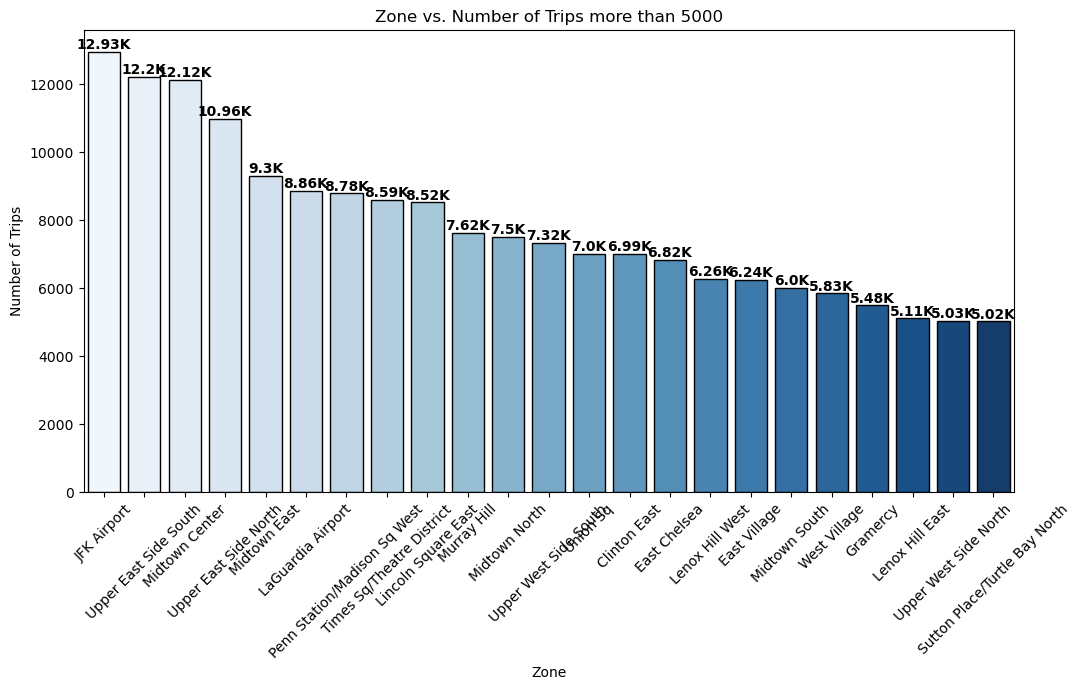

In [37]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='zone',y='number_of_trips', data=df_trips[df_trips['number_of_trips'] > 5000], palette='Blues', edgecolor='black')
# Add annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height()/1000,2)}"+'K',  # Text (value)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.title("Zone vs. Number of Trips more than 5000")

# Show plot
plt.show()

In [39]:
# df.to_csv('intermediate_data_3.csv',index=False)
# df

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [45]:
# Merge trip counts back to the zones GeoDataFrame

GeoDataFrame = pd.merge(left=zones, right=df_trips[['LocationID','number_of_trips']], on='LocationID')
GeoDataFrame.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         5    0.092146    0.000498            Arden Heights           5   
4         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
3  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
4  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   

   number_of_trips  
0                3  
1                7  
2              290  
3                1  
4                3

In [47]:
GeoDataFrame.groupby(['zone'])['number_of_trips'].sum().sort_values(ascending=False)

zone
JFK Airport                            12933
Upper East Side South                  12204
Midtown Center                         12121
Upper East Side North                  10960
Midtown East                            9297
LaGuardia Airport                       8855
Penn Station/Madison Sq West            8780
Times Sq/Theatre District               8594
Lincoln Square East                     8517
Murray Hill                             7616
Midtown North                           7496
Upper West Side South                   7323
Union Sq                                7000
Clinton East                            6992
East Chelsea                            6817
Lenox Hill West                         6256
East Village                            6238
Midtown South                           6001
West Village                            5832
Gramercy                                5485
Lenox Hill East                         5106
Upper West Side North                   5034
Sutto

In [49]:
GeoDataFrame.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'number_of_trips'],
      dtype='object')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

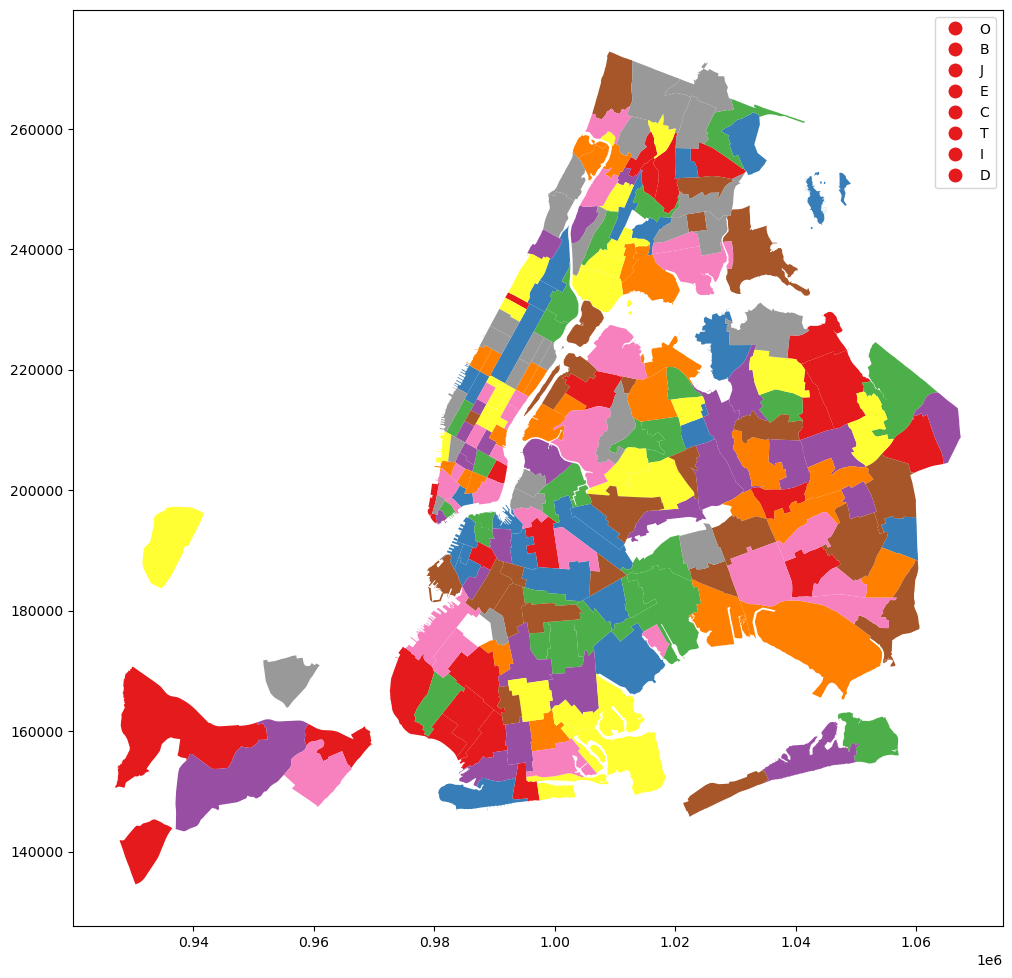

In [51]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 12))

# Plot the map and display it
GeoDataFrame.plot(
    column = 'zone',
ax = ax,
    cmap='Set1',
legend = True,
legend_kwds = {'labels': "OBJECTID"}
)
plt.show()

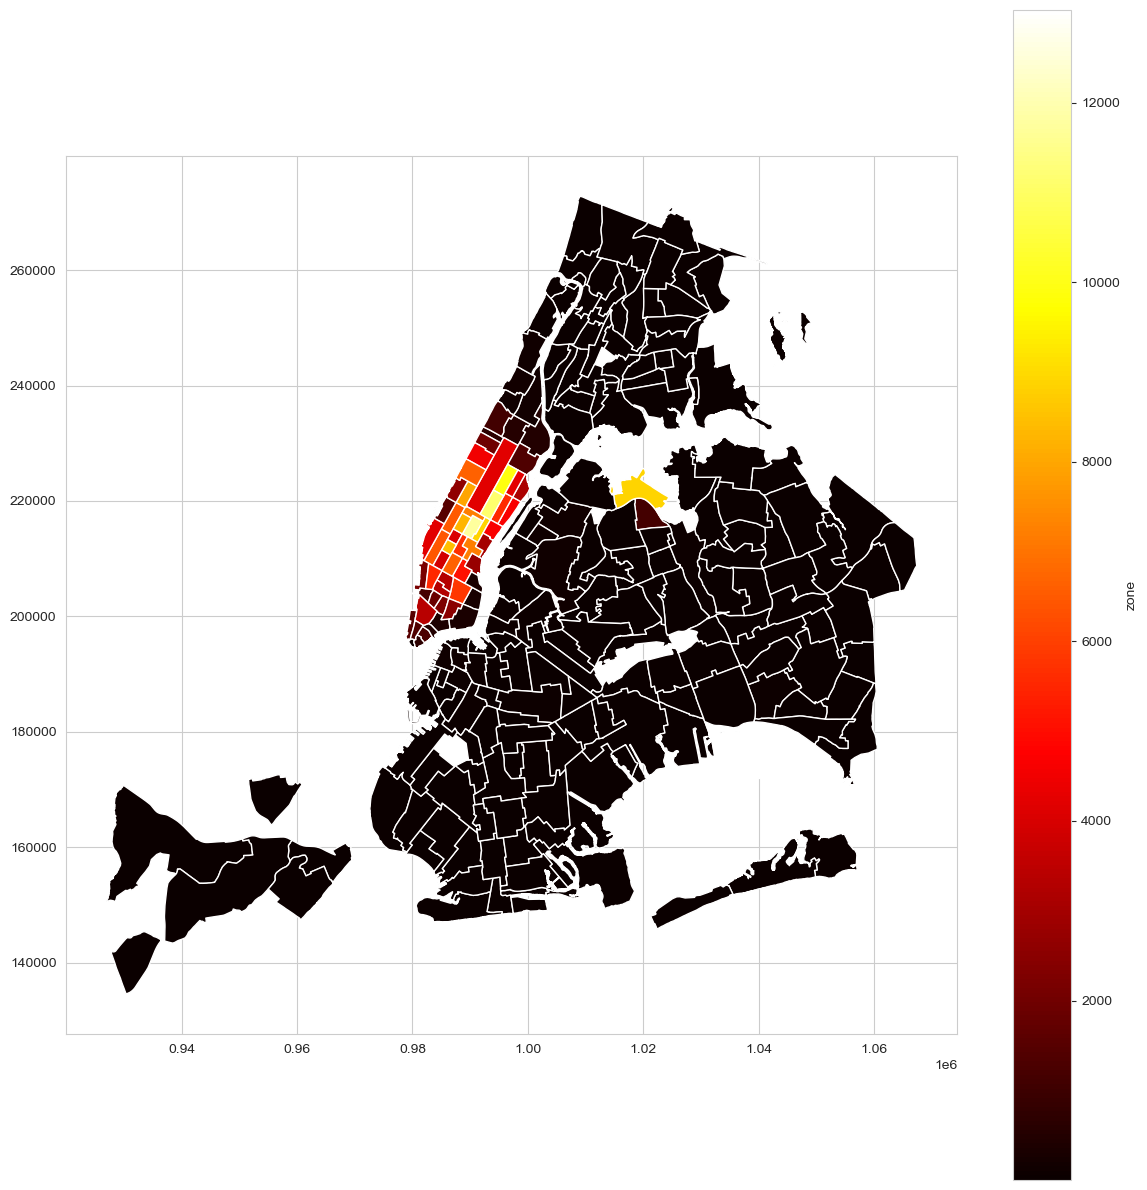

In [269]:
# can you try displaying the zones DF sorted by the number of trips?

fig, ax = plt.subplots(1, 1, figsize = (12, 12))

# Plot the map and display it
GeoDataFrame.plot(
    column = 'number_of_trips',
ax = ax,
    cmap='hot',
legend = True,
    legend_kwds = {'label': "zone"}
# legend_kwds = {'labels': "zone"}
    # legend_kwds = {'orientation': "horizontal"}
)
plt.show()


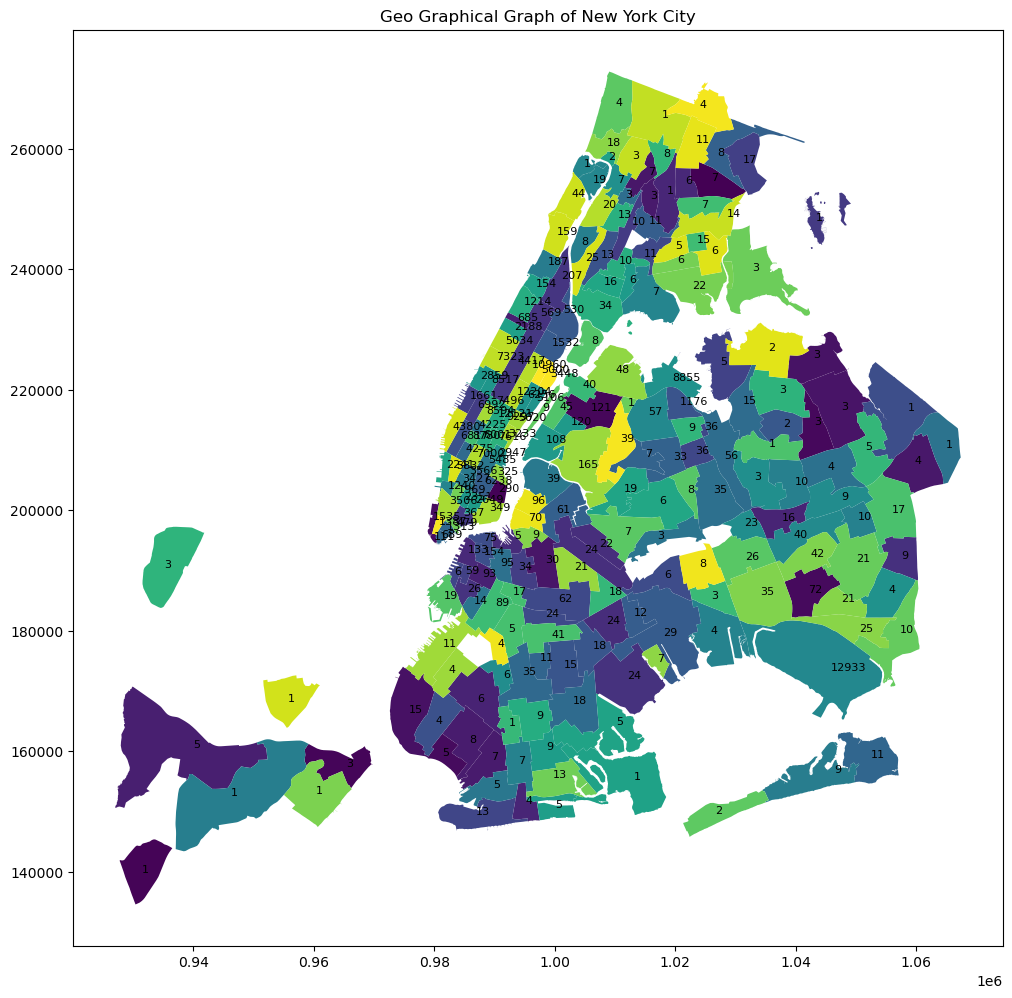

In [97]:
# can you try displaying the zones DF sorted by the number of trips?

fig, ax = plt.subplots(1, 1, figsize = (12, 12))

# Plot the map and display it
GeoDataFrame.plot(
    column = 'zone',
ax = ax,
    cmap='viridis',
legend = False,
    legend_kwds = {'labels': "number_of_trips"}
# legend_kwds = {'labels': "zone"}
    # legend_kwds = {'orientation': "horizontal"}
)

GeoDataFrame["rep"] = GeoDataFrame["geometry"].representative_point()
GeoDataFrame_points = GeoDataFrame.copy()
GeoDataFrame_points.set_geometry("rep", inplace = True)

for x, y, label in zip(GeoDataFrame_points.geometry.x, GeoDataFrame_points.geometry.y, GeoDataFrame_points["number_of_trips"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

plt.title("Geo Graphical Graph of New York City")

plt.show()

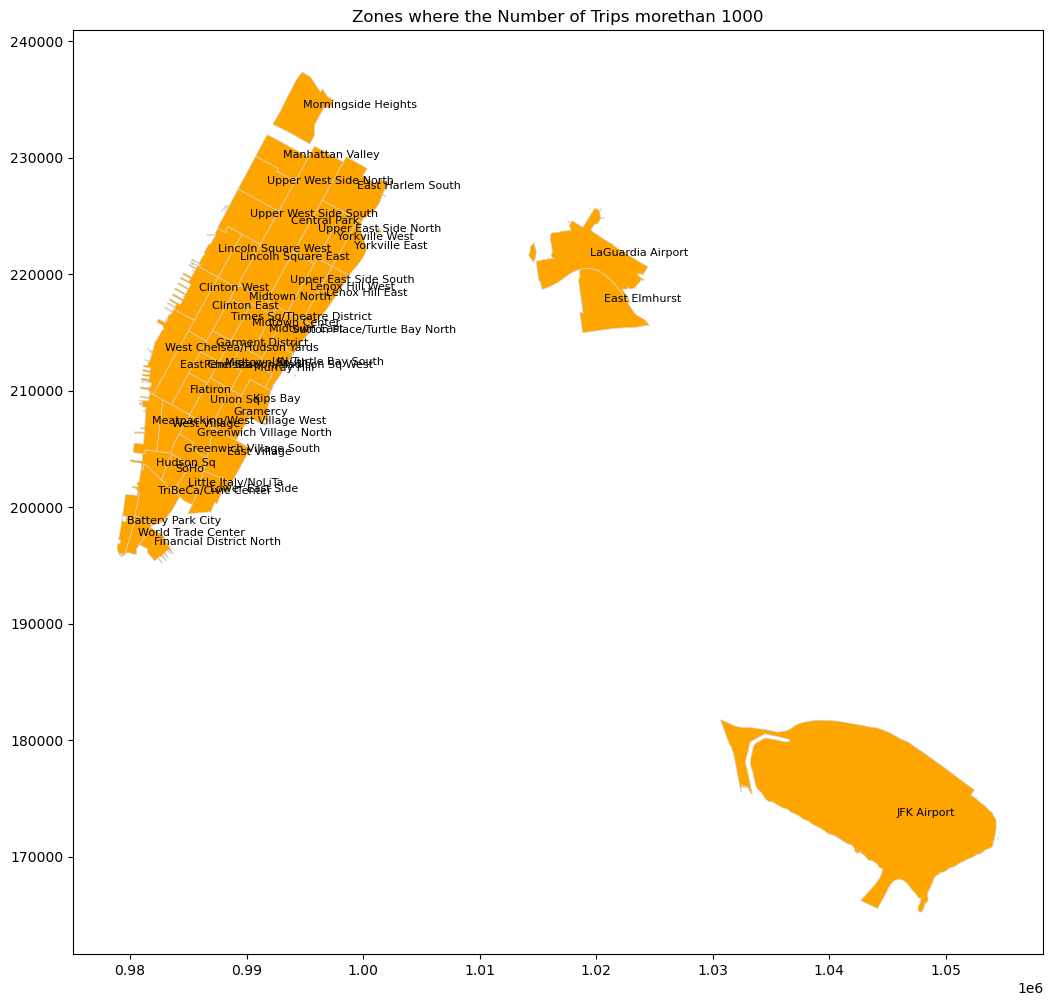

In [93]:
# can you try displaying the zones DF sorted by the number of trips?

# fig, ax = plt.subplots(1, 1, figsize = (12, 12))

# # Plot the map and display it
# GeoDataFrame.plot(
#     column = 'zone',
# ax = ax,
#     cmap='hot',
# legend = False,
#     legend_kwds = {'labels': "number_of_trips"}
# # legend_kwds = {'labels': "zone"}
#     # legend_kwds = {'orientation': "horizontal"}
# )


GeoDataFrame["rep"] = GeoDataFrame["geometry"].representative_point()
GeoDataFrame_points = GeoDataFrame[GeoDataFrame['number_of_trips'] > 1000].copy()
GeoDataFrame_points.set_geometry("rep", inplace = True)

ax = GeoDataFrame[GeoDataFrame['number_of_trips'] > 1000].plot(figsize = (15, 12), color = "Orange", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(GeoDataFrame_points.geometry.x, GeoDataFrame_points.geometry.y, GeoDataFrame_points["zone"]):
    texts.append(plt.text(x, y, label, fontsize = 8))


# ax.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
plt.title("Zones where the Number of Trips morethan 1000")
plt.show()


In [99]:
df_zone.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1         15.6    1.0        4.12           0.0         24.72   
1             1         12.8    1.0        3.56           0.0         21.36   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area            zone  \
0                6  2023Q1       263    0.037017    0.000066  Yorkville West   
1                6  2023Q1        90    0.030759    0.000055        Flatiron   

   LocationID    borough                                           geometry  
0         263  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  
1          90  Manhattan  POLYGON ((985265.129 208165.863, 985125.733 20...

In [101]:
df_distance = pd.DataFrame(df_zone.groupby(['PULocationID','DOLocationID'])['trip_distance'].mean().sort_values(ascending=False)).reset_index()
df_distance.rename(columns={'trip_distance':'avg_trip_distance'},inplace=True)
df_distance.head()

PULocationID  DOLocationID  avg_trip_distance
0            49           265              29.11
1            86           240              28.60
2            40           132              26.36
3           133           132              26.26
4            54           150              26.05

In [106]:
df_total_amount = pd.DataFrame(df_zone.groupby(['PULocationID','DOLocationID'])['total_amount'].mean().sort_values(ascending=False)).reset_index()
df_total_amount.rename(columns={'total_amount':'avg_total_amount'},inplace=True)
df_total_amount.head()

PULocationID  DOLocationID  avg_total_amount
0            50           204           149.990
1           114             5           149.660
2           236             1           139.358
3           262             1           139.350
4           132           206           136.630

In [110]:
total_amount_ana = pd.merge(left=df_zone, right= df_total_amount, on= ['PULocationID','DOLocationID'])
# pd.merge(left=zones, right=df_trips[['LocationID','number_of_trips']], on='LocationID')
total_amount_ana.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  avg_total_amount  
0  POLYGON ((997493.323 220912.386, 997355.264 22...         21.844773  
1  POLYGON ((985265.129 208165.863, 985125.733 20...         19.237742  
2  POLYGON ((988746.067 202151.955, 988733.885 20...         26.250242  
3  POLYGON ((989380.305 218980.247, 989359.803 21...         29.519750  
4  POLYGON ((995735.062 215619.835, 995670.105 21...         49.800000

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

In [112]:
df_zone.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  
0  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  POLYGON ((985265.129 208165.863, 985125.733 20...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((989380.305 218980.247, 989359.803 21...  
4  POLYGON ((995735.062 215619.835, 995670.105 21...

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [131]:
average_travel_time = (df_zone.groupby(['PULocationID','DOLocationID','pickup_hour'])['trip_time_mins'].mean()/60).round(2)
average_travel_time = average_travel_time.reset_index().rename(columns={'trip_time_mins':'trip_time_hours'})
average_travel_time

PULocationID  DOLocationID  pickup_hour  trip_time_hours
0                 1             1           13             0.00
1                 1             1           20             0.00
2                 1           265           16             0.00
3                 3             3           19             0.38
4                 3            77           16             1.19
...             ...           ...          ...              ...
61384           263           264           15             0.27
61385           263           264           19             0.03
61386           263           265            0             0.37
61387           263           265           16             0.98
61388           263           265           21             0.37

[61389 rows x 4 columns]

In [133]:
df_zone_merge = df_zone.merge(average_travel_time, how='left', on=['PULocationID','DOLocationID','pickup_hour'])
df_zone_merge.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  trip_time_hours  
0  POLYGON ((997493.323 220912.386, 997355.264 22...             0.19  
1  POLYGON ((985265.129 208165.863, 985125.733 20...             0.15  
2  POLYGON ((988746.067 202151.955, 988733.885 20...             0.23  
3  POLYGON ((989380.305 218980.247, 989359.803 21...             0.32  
4  POLYGON ((995735.062 215619.835, 995670.105 21...             0.40

In [135]:
# Find routes which have the slowest speeds at different times of the day
df_zone_merge['speed'] = round(df_zone_merge['trip_distance']/df_zone_merge['trip_time_hours'],2)
df_zone_merge.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  trip_time_hours  speed  
0  POLYGON ((997493.323 220912.386, 997355.264 22...             0.19  15.00  
1  POLYGON ((985265.129 208165.863, 985125.733 20...             0.15   8.80  
2  POLYGON ((988746.067 202151.955, 988733.885 20...             0.23  13.78  
3  POLYGON ((989380.305 218980.247, 989359.803 21...             0.32  11.88  
4  POLYGON ((995735.062 215619.835, 995670.105 21...             0.40  19.92

In [154]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

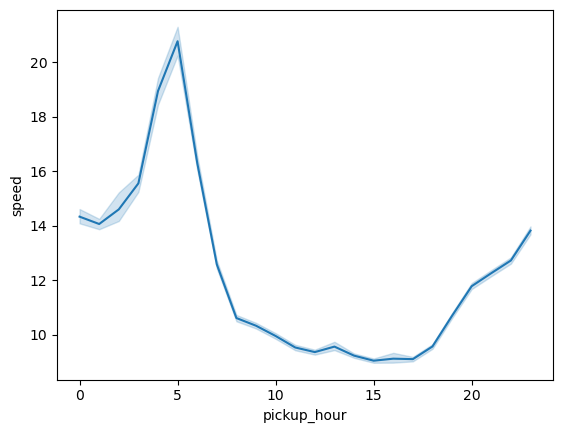

In [139]:
sns.lineplot(data=df_zone_merge, x='pickup_hour',y='speed')
plt.show()

In [186]:
df_zone_merge_routs = pd.merge(left=df_zone_merge, right=zones[['zone','LocationID']], left_on='PULocationID', right_on='LocationID')
# df_zone_merge_routs = pd.merge(left=df_zone_merge, right=zones[['zone','LocationID']], left_on='DOLocationID', right_on='LocationID')
df_zone_merge_routs.drop(columns=['LocationID_y'], inplace=True)
df_zone_merge_routs.rename(columns={'zone_y':'pickup_zone','zone_x':'zone','LocationID_x':'LocationID'},inplace=True)
df_zone_merge_routs.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  trip_time_hours  speed  \
0  POLYGON ((997493.323 220912.386, 997355.264 22...             0.19  15.00   
1  POLYGON ((985265.129 208165.863, 985125.733 20...             0.15   8.80   
2  POLYGON ((988746.067 202151.955, 988733.885 20...             0.23  13.78   
3  POLYGON ((989380.305 218980.247, 989359.803 21...             0.32  11.88   
4  POLYGON ((995735.062 215619.835, 995670.105 21...             0.40  19.92   

           pickup_zone  
0       Yorkville West  
1             Flatiron  
2         Eas

In [188]:
df_zone_merge_routs = pd.merge(left=df_zone_merge_routs, right=zones[['zone','LocationID']], left_on='DOLocationID', right_on='LocationID')
df_zone_merge_routs.drop(columns=['LocationID_y'], inplace=True)
df_zone_merge_routs.rename(columns={'zone_y':'drop_zone','zone_x':'zone','LocationID_x':'LocationID'},inplace=True)
df_zone_merge_routs.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  trip_time_hours  speed  \
0  POLYGON ((997493.323 220912.386, 997355.264 22...             0.19  15.00   
1  POLYGON ((985265.129 208165.863, 985125.733 20...             0.15   8.80   
2  POLYGON ((988746.067 202151.955, 988733.885 20...             0.23  13.78   
3  POLYGON ((989380.305 218980.247, 989359.803 21...             0.32  11.88   
4  POLYGON ((995735.062 215619.835, 995670.105 21...             0.40  19.92   

           pickup_zone        drop_zone  
0       Yorkville West   Central Harlem  
1   

In [192]:
df_zone_merge_routs['route'] = df_zone_merge_routs['pickup_zone'] +'_'+df_zone_merge_routs['drop_zone']
df_zone_merge_routs.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  trip_time_hours  speed  \
0  POLYGON ((997493.323 220912.386, 997355.264 22...             0.19  15.00   
1  POLYGON ((985265.129 208165.863, 985125.733 20...             0.15   8.80   
2  POLYGON ((988746.067 202151.955, 988733.885 20...             0.23  13.78   
3  POLYGON ((989380.305 218980.247, 989359.803 21...             0.32  11.88   
4  POLYGON ((995735.062 215619.835, 995670.105 21...             0.40  19.92   

           pickup_zone        drop_zone                          route  
0       Yorkvil

<Axes: xlabel='route', ylabel='Count'>

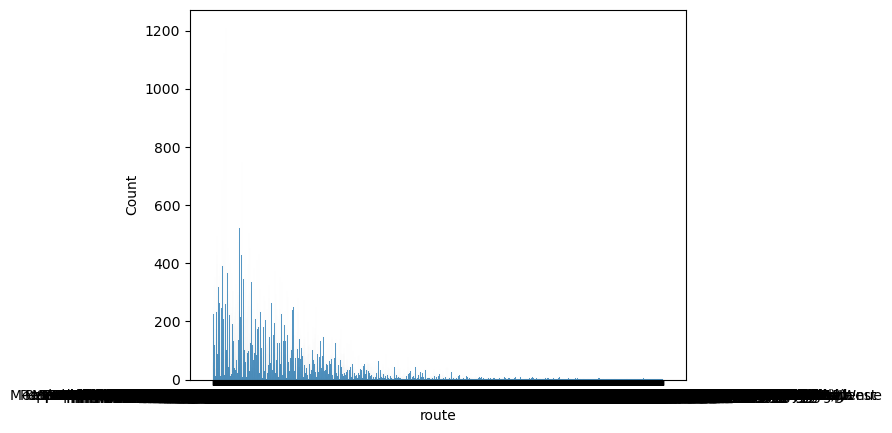

In [220]:
sns.histplot(df_zone_merge_routs[(df_zone_merge_routs['speed'] <10) & (df_zone_merge_routs['pickup_zone'] != df_zone_merge_routs['drop_zone'])]['route'])

In [250]:
slow_routs = df_zone_merge_routs[(df_zone_merge_routs['speed'] <10) & (df_zone_merge_routs['pickup_zone'] != df_zone_merge_routs['drop_zone'])]['route'].value_counts().sort_values(ascending=False).reset_index()
slow_routs[slow_routs['count'] > 500]

route  count
0  Upper East Side North_Upper East Side South   1211
1  Upper East Side South_Upper East Side North   1125
2         Upper East Side South_Midtown Center    749
3         Midtown Center_Upper East Side South    688
4           Upper East Side South_Midtown East    523
5         Upper East Side North_Midtown Center    504

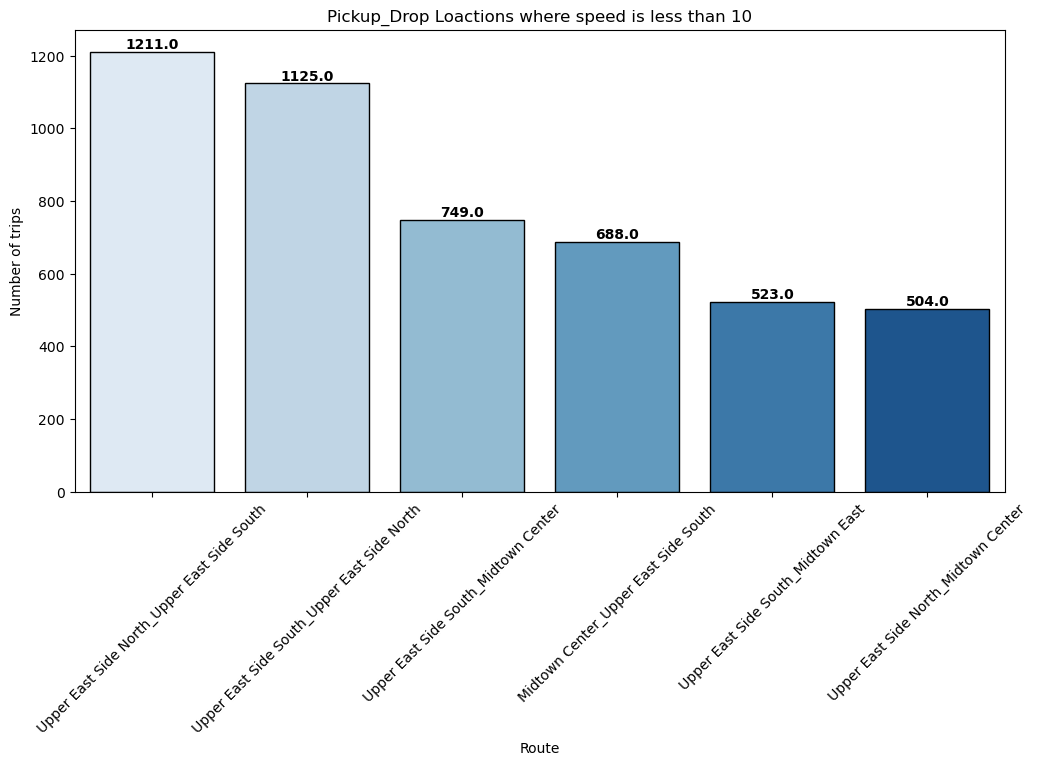

In [253]:
# sns.barplot(data= slow_routs[slow_routs['count'] > 500], x='route',y='count')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='route',y='count', data=slow_routs[slow_routs['count'] > 500], palette='Blues', edgecolor='black')
# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",  # Text (value)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("Route")
plt.ylabel("Number of trips")
plt.xticks(rotation=45)
plt.title("Pickup_Drop Loactions where speed is less than 10")

plt.show()

<!-- df_zone_merge[df_zone_merge['speed'] < 12].zone.value_counts() -->

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

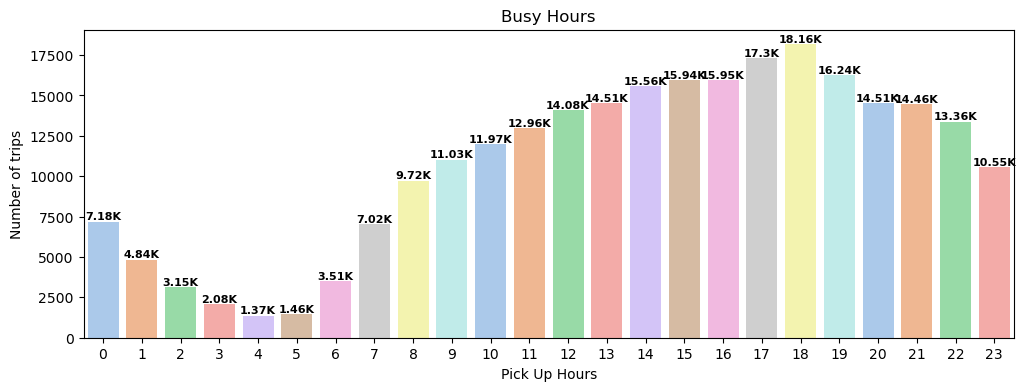

In [270]:
# Visualise the number of trips per hour and find the busiest hour
# sns.countplot(data=df_zone_merge,x='pickup_hour')
plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df_zone_merge, x='pickup_hour', palette='pastel')

for p in ax.patches:
    ax.annotate(f"{round(p.get_height()/1000,2)}"+'K', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, fontweight='bold')
# Labels and title
plt.xlabel("Pick Up Hours")
plt.ylabel("Number of trips")
# plt.xticks(rotation=45)
plt.title("Busy Hours")

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [274]:
df_zone_merge.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'pickup_date', 'pickup_month', 'pickup_day', 'pickup_time',
       'pickup_hour', 'airport_fees', 'pickup_mins', 'dropoff_date',
       'dropoff_month', 'dropoff_day', 'dropoff_time', 'dropoff_hour',
       'dropoff_mins', 'trip_time_mins', 'pickup_weak_day', 'quarter',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'trip_time_hours', 'speed'],
      dtype='object')

In [286]:
df_zone_merge = pd.merge(df_zone_merge, GeoDataFrame[['number_of_trips','LocationID']], how='left', left_on='LocationID', right_on= 'LocationID')

In [288]:
trafic_patters = df_zone_merge.pivot_table(index="pickup_hour", columns="pickup_weak_day", values="number_of_trips",aggfunc='sum').reset_index(drop=False)
# monthly_passinger_fare.drop(columns='passenger_count',inplace=True)
# monthly_passinger_fare.reset_index(
trafic_patters.set_index(['pickup_hour'], inplace = True)
trafic_patters

pickup_weak_day         0         1         2         3         4         5  \
pickup_hour                                                                   
0                 3975602   3701805   4391482   5289145   7048507  10220513   
1                 1790016   1618885   1893394   2383910   3814625   7394569   
2                  870277    786765    924706   1160736   1969564   5092907   
3                  663967    457097    571661    737850   1185110   3335576   
4                  700491    616513    597294    742211   1022123   1789236   
5                 1406264   1411266   1466982   1547481   1448122    978008   
6                 3783613   4103075   4206050   4114787   3598823   2014983   
7                 7243334   8538775   9197465   8932471   7165525   2975405   
8                 9931137  11900214  12199555  11875961   9215004   4838518   
9                10545529  12439921  13065237  12705714  10517277   7452232   
10               11370616  12853758  13056647  12947440  11796398  10415453   
11               11653395  13651656  13868777  13925301  12447556  12186831   
12               12762155  14573223  14863218  15145899  13432328  13362656   
13               13762403  14782876  15429445  15448977  14447464  14036377   
14               14890029  16748532  16802103  16998928  16055051  14148241   
15               15437829  16998155  17311853  17531481  16486849  14759856   
16               15579557  16873543  17224815  17629125  16032581  15135970   
17               16577639  18748713  19430326  19107412  18048253  15878131   
18               17081844  19952480  20866847  20584825  18472991  15624405   
19               14620510  17443294  18776244  18660982  16880147  15290155   
20               13301370  16262800  17477294  16937659  13759301  12389253   
21               12716805  16401637  17483939  17331762  13940065  12978824   
22               10191031  13674218  15557627  15496727  14914910  14315192   
23                6990730   9127302   9970134  11609835  13251121  13557600   

pickup_weak_day         6  
pickup_hour                
0                10744688  
1                 8093938  
2                 5337348  
3                 3801065  
4                 2146512  
5                 1199976  
6                 1915006  
7                 2865266  
8                 4078226  
9                 6815835  
10                9677819  
11               11345587  
12               12978486  
13               13331655  
14               14236370  
15               13994341  
16               14355615  
17               13880505  
18               13544472  
19               11913777  
20               11380133  
21               10751699  
22                8919933  
23                7194429

In [467]:
# trafic_patters = df_zone_merge.groupby(['pickup_weak_day','pickup_hour'],as_index=False)['number_of_trips'].sum()
# trafic_patters

In [290]:
weekday_name = [ 'Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
cols_rename = {}
for i,j in zip(trafic_patters.columns, weekday_name):
    cols_rename[i] = j
cols_rename

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [292]:
trafic_patters.rename(columns=cols_rename,inplace=True)
trafic_patters

pickup_weak_day    Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
pickup_hour                                                                    
0                 3975602   3701805    4391482   5289145   7048507  10220513   
1                 1790016   1618885    1893394   2383910   3814625   7394569   
2                  870277    786765     924706   1160736   1969564   5092907   
3                  663967    457097     571661    737850   1185110   3335576   
4                  700491    616513     597294    742211   1022123   1789236   
5                 1406264   1411266    1466982   1547481   1448122    978008   
6                 3783613   4103075    4206050   4114787   3598823   2014983   
7                 7243334   8538775    9197465   8932471   7165525   2975405   
8                 9931137  11900214   12199555  11875961   9215004   4838518   
9                10545529  12439921   13065237  12705714  10517277   7452232   
10               11370616  12853758   13056647  12947440  11796398  10415453   
11               11653395  13651656   13868777  13925301  12447556  12186831   
12               12762155  14573223   14863218  15145899  13432328  13362656   
13               13762403  14782876   15429445  15448977  14447464  14036377   
14               14890029  16748532   16802103  16998928  16055051  14148241   
15               15437829  16998155   17311853  17531481  16486849  14759856   
16               15579557  16873543   17224815  17629125  16032581  15135970   
17               16577639  18748713   19430326  19107412  18048253  15878131   
18               17081844  19952480   20866847  20584825  18472991  15624405   
19               14620510  17443294   18776244  18660982  16880147  15290155   
20               13301370  16262800   17477294  16937659  13759301  12389253   
21               12716805  16401637   17483939  17331762  13940065  12978824   
22               10191031  13674218   15557627  15496727  14914910  14315192   
23                6990730   9127302    9970134  11609835  13251121  13557600   

pickup_weak_day    Sunday  
pickup_hour                
0                10744688  
1                 8093938  
2                 5337348  
3                 3801065  
4                 2146512  
5                 1199976  
6                 1915006  
7                 2865266  
8                 4078226  
9                 6815835  
10                9677819  
11               11345587  
12               12978486  
13               13331655  
14               14236370  
15               13994341  
16               14355615  
17               13880505  
18               13544472  
19               11913777  
20               11380133  
21               10751699  
22                8919933  
23                7194429

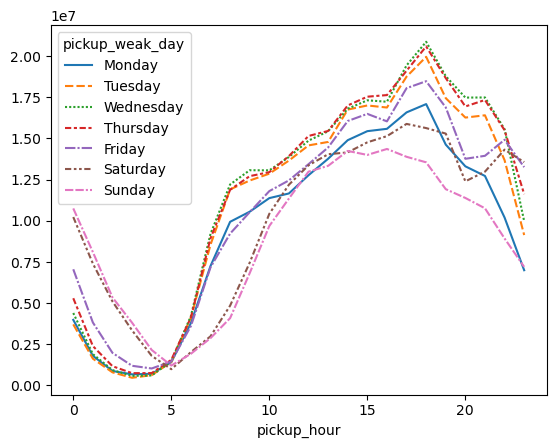

In [294]:
sns.color_palette("tab10")
sns.lineplot(trafic_patters)
plt.show()

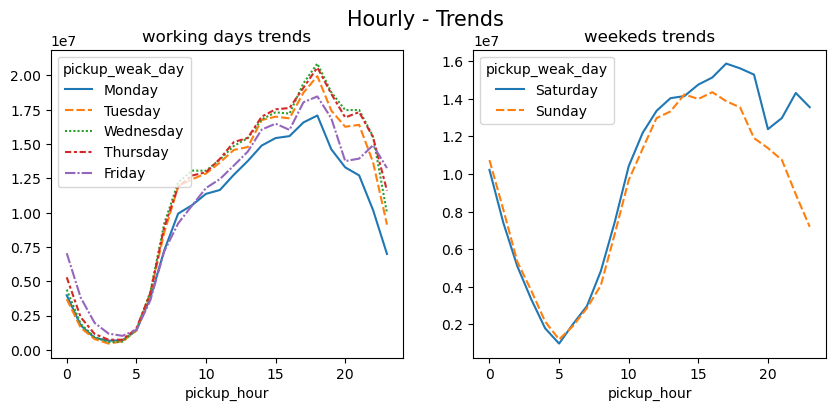

In [311]:
# Compare traffic trends for the week days and weekends

fig, ax= plt.subplots(1,2,figsize=(10,4))
ax0 = sns.lineplot(trafic_patters[['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday']],ax=ax[0], color='slategray')
# ax0.set_label("Kde distribution cureve")
# ax0.set_color("red")
ax[0].set_title('working days trends')
sns.lineplot(trafic_patters[['Saturday','Sunday']],ax=ax[1], color='teal')
ax[1].set_title('weekeds trends')
# ax[1].set_yticks([0,20000000])
# plt.set_title('Hourly Pick UP Distribution')
fig.tight_layout
fig.suptitle('Hourly - Trends', fontsize=15)
plt.show()

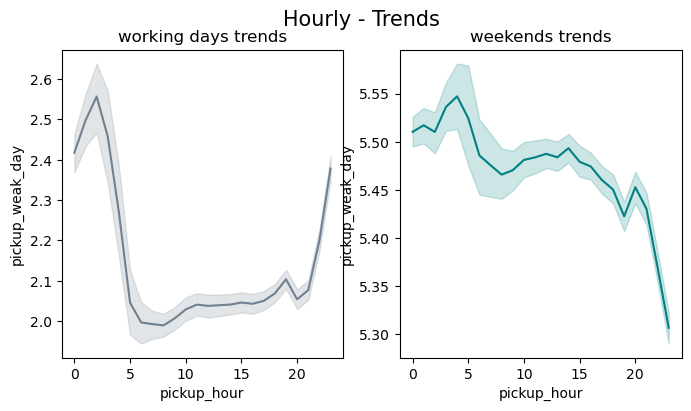

In [313]:
# Compare traffic trends for the week days and weekends

fig, ax= plt.subplots(1,2,figsize=(8,4))
ax0 = sns.lineplot(df_zone_merge[df_zone_merge['pickup_weak_day'].isin([0,1,2,3,4])], x='pickup_hour', y='pickup_weak_day',ax=ax[0], color='slategray')
# ax0.set_label("Kde distribution cureve")
# ax0.set_color("red")
ax[0].set_title('working days trends')
sns.lineplot(df_zone_merge[df_zone_merge['pickup_weak_day'].isin([5,6])], x='pickup_hour', y='pickup_weak_day',ax=ax[1], color='teal')
ax[1].set_title('weekends trends')
# plt.set_title('Hourly Pick UP Distribution')
fig.tight_layout
fig.suptitle('Hourly - Trends', fontsize=15)
plt.show()

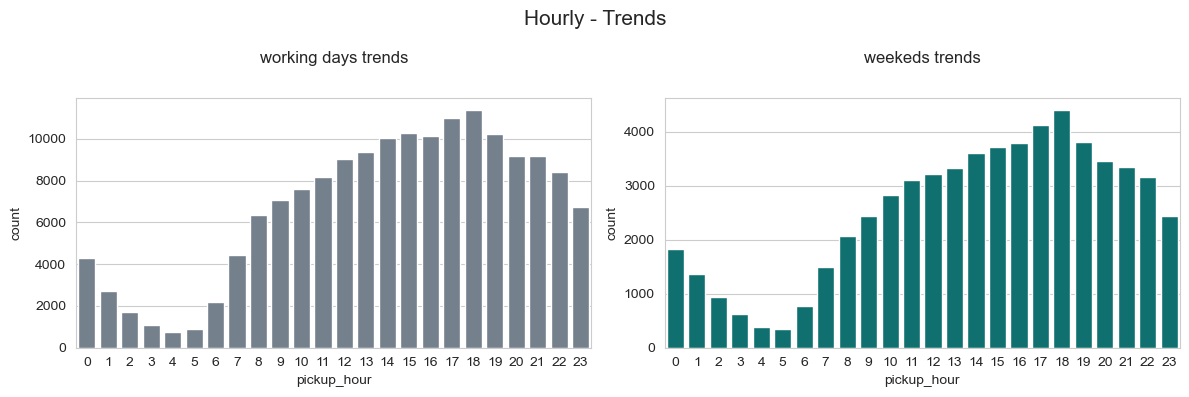

In [427]:
fig, ax= plt.subplots(1,2,figsize=(12,4))
ax0 = sns.countplot(df_zone_merge[df_zone_merge['pickup_weak_day'].isin([0,1,2,3,4])], x='pickup_hour',ax=ax[0], color='slategray')
# ax0.set_label("Kde distribution cureve")
# ax0.set_color("red")
ax[0].set_title('working days trends')
sns.countplot(df_zone_merge[df_zone_merge['pickup_weak_day'].isin([5,6])], x='pickup_hour',ax=ax[1], color='teal')
ax[1].set_title('weekeds trends')
# plt.set_title('Hourly Pick UP Distribution')
fig.tight_layout
fig.suptitle('Hourly - Trends', fontsize=15)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

- in weekdays `Thursday` number of trips are more among the other days and `Monday` trips are low
- `Saturday` trips are on top compared to remaiing all other days

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [320]:
pickup_count = df_zone_merge.groupby(['pickup_hour', 'zone']).size().reset_index(name='pickup_count')
pickup_top_zones = pickup_count.sort_values(by='pickup_count', ascending=False)
pickup_top_zones.head(10)

pickup_hour                   zone  pickup_count
2289           17         Midtown Center          1070
2415           18         Midtown Center          1068
2157           16         Midtown Center           947
2328           17  Upper East Side South           926
2055           15  Upper East Side South           923
1991           15            JFK Airport           919
2054           15  Upper East Side North           916
2536           19         Midtown Center           906
1914           14  Upper East Side South           901
2196           16  Upper East Side South           894

In [326]:
dropoff_count = df_zone_merge.groupby(['dropoff_hour', 'zone']).size().reset_index(name='dropoff_count')
dropoff_top_zones = dropoff_count.sort_values(by='dropoff_count', ascending=False)
dropoff_top_zones.head(10)

dropoff_hour                   zone  dropoff_count
2392            18         Midtown Center           1146
2262            17         Midtown Center           1043
2942            23            JFK Airport            947
2516            19         Midtown Center            946
2127            16         Midtown Center            941
2028            15  Upper East Side North            938
2300            17  Upper East Side South            936
2435            18  Upper East Side South            924
2614            20            JFK Airport            922
2105            16            JFK Airport            919

In [328]:
# Find top 10 pickup and dropoff zones

pickup_top_zones.head(10)

pickup_hour                   zone  pickup_count
2289           17         Midtown Center          1070
2415           18         Midtown Center          1068
2157           16         Midtown Center           947
2328           17  Upper East Side South           926
2055           15  Upper East Side South           923
1991           15            JFK Airport           919
2054           15  Upper East Side North           916
2536           19         Midtown Center           906
1914           14  Upper East Side South           901
2196           16  Upper East Side South           894

In [330]:
dropoff_top_zones.head(10)

dropoff_hour                   zone  dropoff_count
2392            18         Midtown Center           1146
2262            17         Midtown Center           1043
2942            23            JFK Airport            947
2516            19         Midtown Center            946
2127            16         Midtown Center            941
2028            15  Upper East Side North            938
2300            17  Upper East Side South            936
2435            18  Upper East Side South            924
2614            20            JFK Airport            922
2105            16            JFK Airport            919

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [333]:
pickup_top_zones.rename(columns={'pickup_hour':'hour'}, inplace=True)
dropoff_top_zones.rename(columns={'dropoff_hour':'hour'}, inplace=True)

In [335]:
pickup_top_zones.shape, dropoff_top_zones.shape

((3020, 3), (3004, 3))

In [343]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pick_drop_ration = pd.merge(left=pickup_top_zones, right=dropoff_top_zones,how='left', on=['hour','zone'])
pick_drop_ration['pick_by_drop_ratioin'] = pick_drop_ration['pickup_count']/pick_drop_ration['dropoff_count']
temp = pick_drop_ration.groupby(['zone'])['pick_by_drop_ratioin'].sum().sort_values(ascending=False).reset_index().head(10)
temp

zone  pick_by_drop_ratioin
0                    Astoria             30.382914
1  Williamsburg (South Side)             27.598413
2          LaGuardia Airport             26.964752
3                  Sunnyside             26.523493
4                 Park Slope             26.452165
5         World Trade Center             25.618425
6    Greenwich Village South             25.438057
7   Financial District North             25.270457
8             Manhattanville             25.177237
9              Alphabet City             25.026662

In [534]:
pick_drop_ration.groupby(['zone'])['pick_by_drop_ratioin'].sum().sort_values(ascending=True).head(10)

zone
South Beach/Dongan Hills        0.0
Arden Heights                   0.0
Fordham South                   0.0
East Flushing                   0.0
Schuylerville/Edgewater Park    0.0
Inwood Hill Park                0.0
City Island                     0.0
Heartland Village/Todt Hill     0.0
Ocean Parkway South             0.0
Bronx Park                      0.0
Name: pick_by_drop_ratioin, dtype: float64

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [345]:
pick_drop_ration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hour                  3020 non-null   int64  
 1   zone                  3020 non-null   object 
 2   pickup_count          3020 non-null   int64  
 3   dropoff_count         2708 non-null   float64
 4   pick_by_drop_ratioin  2708 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 118.1+ KB


In [349]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
pick_drop_ration[(pick_drop_ration['hour'] >= 23 ) | (pick_drop_ration['hour'] < 5 ) ].sort_values(by=['pickup_count','hour'], ascending=False).head(10)


hour                 zone  pickup_count  dropoff_count  \
14     23          JFK Airport           869          947.0   
71     23    LaGuardia Airport           559          550.0   
84      0          JFK Airport           537          739.0   
95     23         East Village           515          527.0   
102     0         East Village           510          537.0   
126    23         West Village           489          504.0   
142     1         East Village           462          461.0   
141     0         West Village           462          469.0   
164    23         Clinton East           437          478.0   
166    23  Lincoln Square East           433          489.0   

     pick_by_drop_ratioin  
14               0.917635  
71               1.016364  
84               0.726658  
95               0.977230  
102              0.949721  
126              0.970238  
142              1.002169  
141              0.985075  
164              0.914226  
166              0.885481

In [638]:
# pick_drop_ration[(pick_drop_ration['hour'] >= 23 ) | (pick_drop_ration['hour'] < 5 ) ].sort_values(by='pickup_count', ascending=False).head(10)

In [550]:
pick_drop_ration[(pick_drop_ration['hour'] >= 23 ) | (pick_drop_ration['hour'] < 5 ) ].sort_values(by='dropoff_count', ascending=False).head(10)

hour                       zone  pickup_count  dropoff_count  \
7      23                JFK Airport           878          957.0   
71      0                JFK Airport           542          754.0   
64     23          LaGuardia Airport           560          552.0   
115     0               East Village           471          498.0   
107    23               East Village           481          492.0   
113    23               West Village           472          489.0   
171    23        Lincoln Square East           406          459.0   
166    23               Clinton East           413          453.0   
174    23  Times Sq/Theatre District           401          453.0   
139     0               West Village           441          447.0   

     pick_by_drop_ratioin  
7                0.917450  
71               0.718833  
64               1.014493  
115              0.945783  
107              0.977642  
113              0.965235  
171              0.884532  
166              0.911700  
174              0.885210  
139              0.986577

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [351]:
df_zone_merge.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'pickup_date', 'pickup_month', 'pickup_day', 'pickup_time',
       'pickup_hour', 'airport_fees', 'pickup_mins', 'dropoff_date',
       'dropoff_month', 'dropoff_day', 'dropoff_time', 'dropoff_hour',
       'dropoff_mins', 'trip_time_mins', 'pickup_weak_day', 'quarter',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'trip_time_hours', 'speed', 'number_of_trips'],
      dtype='object')

In [357]:
# Filter for night hours (11 PM to 5 AM)
df_zone_merge['day_night'] = np.where((df_zone_merge['pickup_hour'] >= 23) | (df_zone_merge['pickup_hour'] < 5), 'Night_Time', 'Day_Time')
temp2 = df_zone_merge.groupby(['day_night'])['total_amount'].sum().reset_index()
temp2

day_night  total_amount
0    Day_Time    6463054.70
1  Night_Time     831126.63

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [398]:
print(df_zone_merge.shape)
df_zone_merge = df_zone_merge[df_zone_merge['trip_distance'] != 0]
print(df_zone_merge.shape)

(256949, 43)
(245816, 43)


In [400]:
# Analyse the fare per mile per passenger for different passenger counts
df_zone_merge['trip_distance'] = round(df_zone_merge['trip_distance'])
avg_fare_per_passinger_per_mile = df_zone_merge.groupby(['passenger_count','trip_distance']).agg({'total_amount':'mean'}).reset_index(drop=False)
avg_fare_per_passinger_per_mile

passenger_count  trip_distance  total_amount
0                1.0            1.0     16.117166
1                1.0            2.0     21.756620
2                1.0            3.0     27.277657
3                1.0            4.0     32.005245
4                1.0            5.0     36.014823
5                1.0            6.0     39.957444
6                1.0            7.0     44.542328
7                1.0            8.0     52.112524
8                1.0            9.0     60.620410
9                1.0           10.0     64.966874
10               1.0           11.0     67.868060
11               1.0           12.0     69.854155
12               1.0           13.0     73.991138
13               1.0           14.0     76.111978
14               1.0           15.0     80.371784
15               1.0           16.0     85.656982
16               1.0           17.0     92.282491
17               1.0           18.0     94.111191
18               1.0           19.0     92.787828
19               1.0           20.0     94.968163
20               1.0           21.0     94.236894
21               1.0           22.0     95.253976
22               1.0           23.0     97.595044
23               1.0           24.0    103.365472
24               1.0           25.0    108.824884
25               1.0           26.0    109.222881
26               1.0           27.0    108.780000
27               1.0           28.0     93.363871
28               1.0           29.0     95.097586
29               1.0           30.0     86.477143
30               2.0            1.0     16.387982
31               2.0            2.0     21.733502
32               2.0            3.0     27.519688
33               2.0            4.0     32.492493
34               2.0            5.0     37.079401
35               2.0            6.0     40.742023
36               2.0            7.0     45.315278
37               2.0            8.0     54.377925
38               2.0            9.0     62.321487
39               2.0           10.0     66.455261
40               2.0           11.0     69.668973
41               2.0           12.0     73.150353
42               2.0           13.0     76.051220
43               2.0           14.0     80.024342
44               2.0           15.0     83.894266
45               2.0           16.0     89.378271
46               2.0           17.0     92.773359
47               2.0           18.0     92.876224
48               2.0           19.0     93.968146
49               2.0           20.0     93.515257
50               2.0           21.0     94.206537
51               2.0           22.0     94.919886
52               2.0           23.0     98.320625
53               2.0           24.0     99.048500
54               2.0           25.0    109.030556
55               2.0           26.0    103.742500
56               2.0           27.0     93.060909
57               2.0           28.0     95.216667
58               2.0           29.0     88.636000
59               2.0           30.0     87.393333
60               3.0            1.0     16.376796
61               3.0            2.0     21.832739
62               3.0            3.0     27.208669
63               3.0            4.0     32.728390
64               3.0            5.0     37.180677
65               3.0            6.0     40.795198
66               3.0            7.0     45.573630
67               3.0            8.0     56.302261
68               3.0            9.0     61.197090
69               3.0           10.0     64.215638
70               3.0           11.0     71.764949
71               3.0           12.0     71.985556
72               3.0           13.0     78.338980
73               3.0           14.0     77.017500
74               3.0           15.0     85.281563
75               3.0           16.0     86.432540
76               3.0           17.0     94.884526
77               3.0           18.0     95.275407
78               3.0           19.0     94.229167
79   

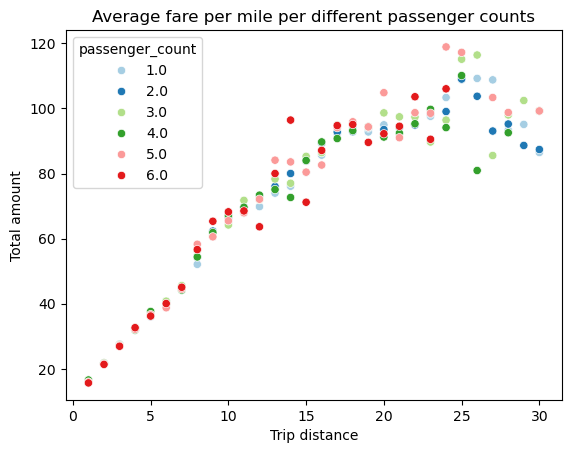

In [402]:
# sns.color_palette("hls", 6)
sns.scatterplot(avg_fare_per_passinger_per_mile, x='trip_distance', y='total_amount',hue='passenger_count',palette='Paired')
# Labels and title
plt.xlabel("Trip distance")
plt.ylabel("Total amount")
# plt.xticks(rotation=45)
plt.title("Average fare per mile per different passenger counts")
plt.show()

In [396]:
# df_zone_merge[df_zone_merge['trip_distance'] == 0].shape

In [378]:
# # Pivot data for stacked bar chart
# df_pivot = df.pivot(index='passenger_count', columns='trip_distance', values='total_amount',)

# # Plot stacked bar chart
# ax = df_pivot.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Pastel1')

# # Annotate bars with values
# for bars in ax.containers:
#     ax.bar_label(bars, fmt='%d', label_type='center', fontsize=10, fontweight='bold')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [404]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_hour_weekday_per_mile = df_zone_merge.groupby(['pickup_weak_day','pickup_hour','trip_distance']).agg({'total_amount':'mean'}).reset_index(drop=False)
avg_fare_per_hour_weekday_per_mile


pickup_weak_day  pickup_hour  trip_distance  total_amount
0                   0            0            1.0     14.282797
1                   0            0            2.0     19.044444
2                   0            0            3.0     24.106875
3                   0            0            4.0     29.042381
4                   0            0            5.0     30.921034
...               ...          ...            ...           ...
3950                6           23           21.0     91.701667
3951                6           23           22.0     85.943333
3952                6           23           23.0    108.260000
3953                6           23           24.0    102.593333
3954                6           23           26.0    112.185000

[3955 rows x 4 columns]

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [409]:
# Compare fare per mile for different vendors
avg_fare_per_hour_vendor_per_mile = df_zone_merge.groupby(['VendorID','trip_distance']).agg({'total_amount':'mean'}).reset_index(drop=False)
avg_fare_per_hour_vendor_per_mile


VendorID  trip_distance  total_amount
0          1            1.0     15.949843
1          1            2.0     21.377190
2          1            3.0     26.943861
3          1            4.0     31.493563
4          1            5.0     35.541727
5          1            6.0     38.842033
6          1            7.0     43.808907
7          1            8.0     51.688724
8          1            9.0     59.395714
9          1           10.0     64.148270
10         1           11.0     66.499446
11         1           12.0     66.869487
12         1           13.0     69.962331
13         1           14.0     71.874135
14         1           15.0     77.281028
15         1           16.0     85.260787
16         1           17.0     91.073629
17         1           18.0     92.636471
18         1           19.0     92.756359
19         1           20.0     93.986667
20         1           21.0     93.700217
21         1           22.0     93.766173
22         1           23.0     91.821250
23         1           24.0    102.884667
24         1           25.0    104.845000
25         1           26.0    102.912500
26         1           27.0    101.322857
27         1           28.0     95.852727
28         1           29.0     90.940000
29         1           30.0     84.170000
30         2            1.0     16.241945
31         2            2.0     21.898007
32         2            3.0     27.423706
33         2            4.0     32.334294
34         2            5.0     36.468382
35         2            6.0     40.538490
36         2            7.0     44.937475
37         2            8.0     53.030122
38         2            9.0     61.416475
39         2           10.0     65.561594
40         2           11.0     68.832969
41         2           12.0     71.550742
42         2           13.0     76.088254
43         2           14.0     78.894969
44         2           15.0     82.481700
45         2           16.0     86.998786
46         2           17.0     92.980418
47         2           18.0     94.200311
48         2           19.0     93.276846
49         2           20.0     95.001295
50         2           21.0     94.442052
51         2           22.0     95.892285
52         2           23.0     98.882258
53         2           24.0    101.509571
54         2           25.0    110.421053
55         2           26.0    109.817667
56         2           27.0    106.004000
57         2           28.0     93.777273
58         2           29.0     94.347188
59         2           30.0     89.255455

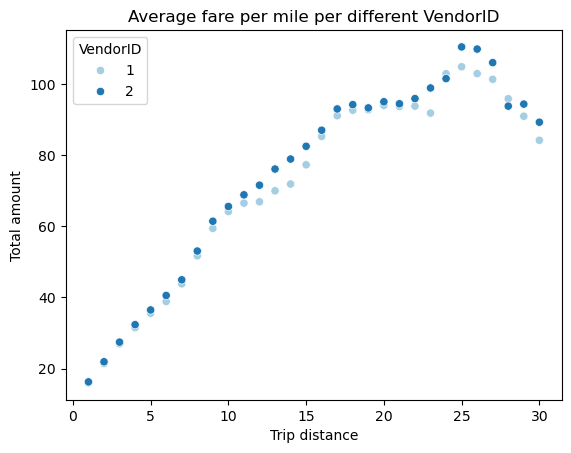

In [411]:
# sns.color_palette("hls", 6)
sns.scatterplot(avg_fare_per_hour_vendor_per_mile, x='trip_distance', y='total_amount',hue='VendorID',palette='Paired')
# Labels and title
plt.xlabel("Trip distance")
plt.ylabel("Total amount")
# plt.xticks(rotation=45)
plt.title("Average fare per mile per different VendorID")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [413]:
# Defining distance tiers
avg_fare_per_hour_vendor_per_mile['fare_rates'] = np.where((avg_fare_per_hour_vendor_per_mile['trip_distance'] < 2), 'small_distance', 
                                                            np.where((avg_fare_per_hour_vendor_per_mile['trip_distance'] >= 2) & 
                                                                     (avg_fare_per_hour_vendor_per_mile['trip_distance']  < 5), 'mediam_distance', 'large_distance'))
avg_fare_per_hour_vendor_per_mile.groupby(['fare_rates'])['total_amount'].sum().reset_index()

fare_rates  total_amount
0   large_distance   4200.448734
1  mediam_distance    161.470621
2   small_distance     32.191789

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [417]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_zone_merge['tip_percentage'] = (df_zone_merge['tip_amount']/df_zone_merge['total_amount']) * 100
avg_tips_per_pass_pickup_per_mile = df_zone_merge.groupby(['passenger_count','pickup_hour','trip_distance']).agg({'tip_percentage':'mean'}).reset_index(drop=False)
avg_tips_per_pass_pickup_per_mile


passenger_count  pickup_hour  trip_distance  tip_percentage
0                 1.0            0            1.0       12.146397
1                 1.0            0            2.0       12.458965
2                 1.0            0            3.0       12.256865
3                 1.0            0            4.0       12.142610
4                 1.0            0            5.0       12.056876
...               ...          ...            ...             ...
2817              6.0           23           10.0       12.878788
2818              6.0           23           11.0       16.666667
2819              6.0           23           14.0       16.666667
2820              6.0           23           19.0        0.000000
2821              6.0           23           20.0       23.080714

[2822 rows x 4 columns]

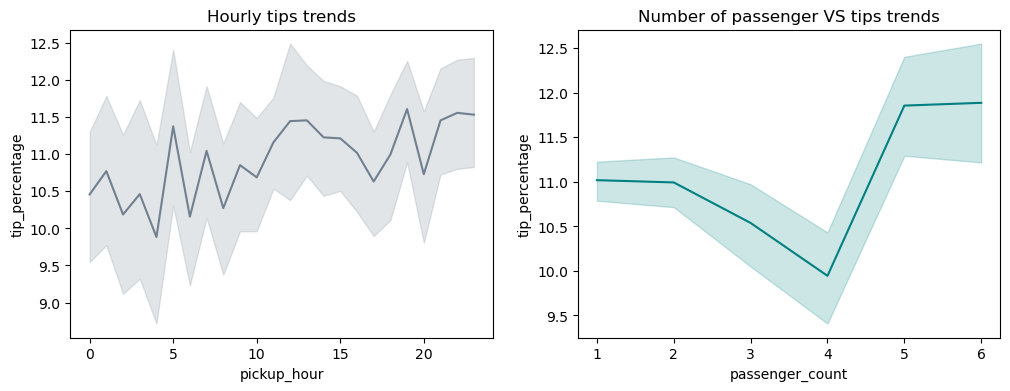

In [421]:
fig, ax= plt.subplots(1,2,figsize=(12,4))
ax0 = sns.lineplot(avg_tips_per_pass_pickup_per_mile, x='pickup_hour',y='tip_percentage',ax=ax[0], color='slategray')
# ax0.set_label("Kde distribution cureve")
# ax0.set_color("red")
ax[0].set_title('Hourly tips trends')
sns.lineplot(avg_tips_per_pass_pickup_per_mile, x='passenger_count',y='tip_percentage',ax=ax[1], color='teal')
ax[1].set_title('Number of passenger VS tips trends')
# plt.set_title('Hourly Pick UP Distribution')
fig.tight_layout
# fig.suptitle('Hourly - Trends', fontsize=15)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

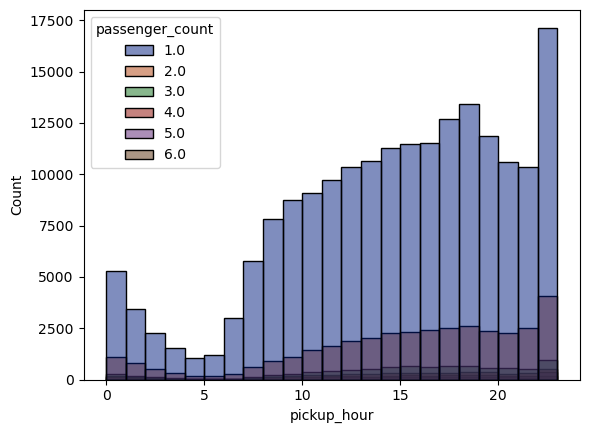

In [423]:
# See how passenger count varies across hours and days
# df_zone_merge.pivot_table(index="pickup_hour", columns="pickup_weak_day", values="number_of_trips",aggfunc='sum').reset_index(drop=False)
sns.histplot(data=df_zone_merge,x='pickup_hour', hue='passenger_count',palette='dark', binwidth=1)
plt.show()



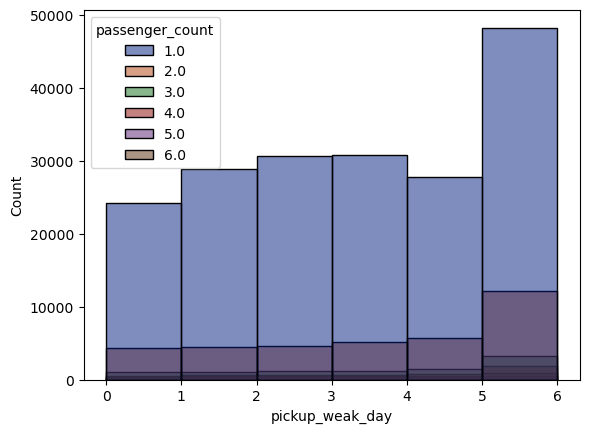

In [425]:
sns.histplot(data=df_zone_merge,x='pickup_weak_day', hue='passenger_count',palette='dark', binwidth=1)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

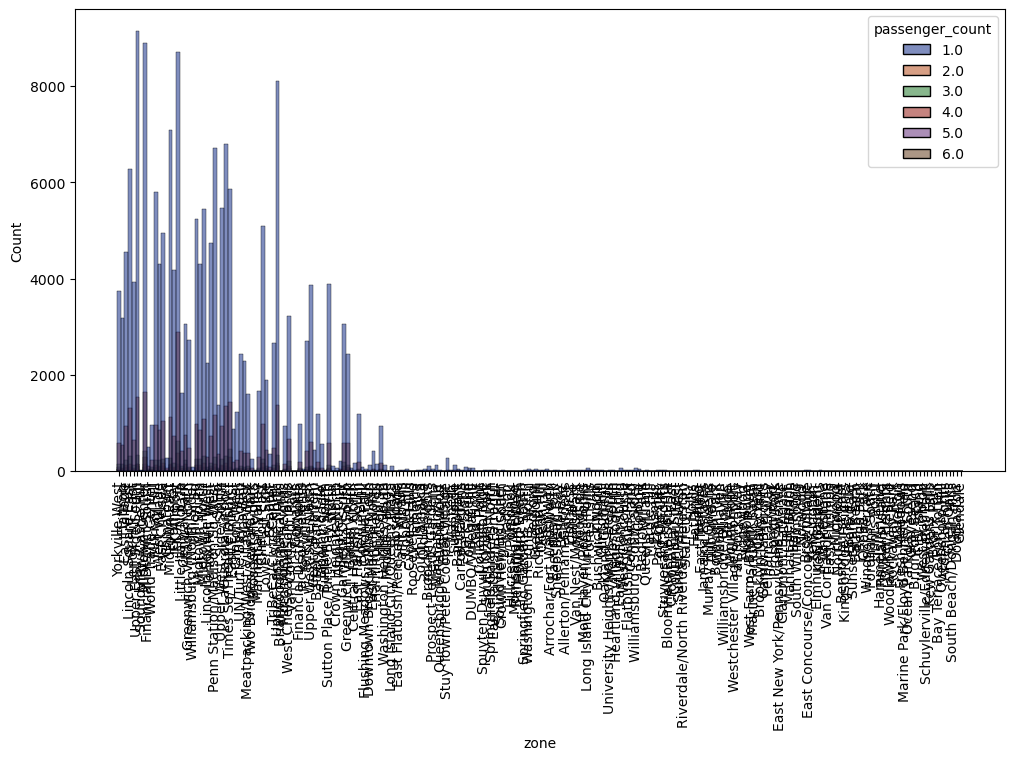

In [429]:
# How does passenger count vary across zones
# df_zone_merge.zone.value_counts()
plt.figure(figsize=(12,6))
sns.histplot(data=df_zone_merge,x='zone', hue='passenger_count',palette='dark', binwidth=1, cbar=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

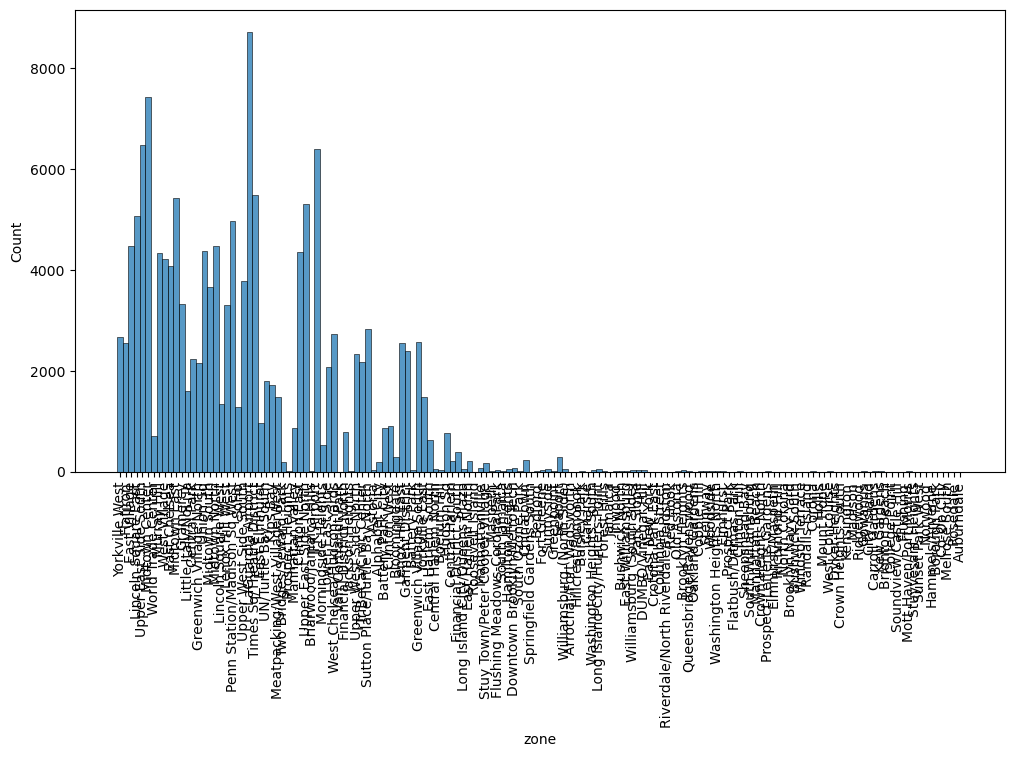

In [435]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_zone_merge[df_zone_merge['extra'] >0],x='zone',palette='dark', binwidth=1, cbar=True)
plt.xticks(rotation=90)
plt.show()

In [431]:
# How often is each surcharge applied?

df_zone_merge.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            3.0         1.0                  N           263            41   
1            1.0         1.0                  N            90           137   
2            3.0         1.0                  N            79           141   
3            4.0         1.0                  N           142           107   
4            8.0         1.0                  N           140            17   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             1        15.60    1.0        4.12           0.0         24.72   
1             1        12.80    1.0        3.56           0.0         21.36   
2             1        14.90    1.0        3.98           0.0         23.88   
3             2        24.70    1.0        0.00           0.0         29.70   
4             5        36.83    0.0        8.17           0.0         49.00   

   congestion_surcharge pickup_date  pickup_month  pickup_day pickup_time  \
0                   2.5  2023-01-01             1           1    00:31:50   
1                   2.5  2023-01-01             1           1    00:10:50   
2                   2.5  2023-01-01             1           1    00:25:37   
3                   2.5  2023-01-01             1           1    00:27:26   
4                   2.5  2023-01-01             1           1    00:59:15   

   pickup_hour  airport_fees  pickup_mins dropoff_date  dropoff_month  \
0            0           0.0           31   2023-01-01              1   
1            0           0.0           10   2023-01-01              1   
2            0           0.0           25   2023-01-01              1   
3            0           0.0           27   2023-01-01              1   
4            0           0.0           59   2023-01-01              1   

   dropoff_day dropoff_time  dropoff_hour  dropoff_mins  trip_time_mins  \
0            1     00:44:17             0            44           12.45   
1            1     00:24:12             0            24           13.37   
2            1     00:34:52             0            34            9.25   
3            1     00:52:20             0            52           24.90   
4            1     01:23:15             1            23           24.00   

   pickup_weak_day quarter  OBJECTID  Shape_Leng  Shape_Area  \
0                6  2023Q1       263    0.037017    0.000066   
1                6  2023Q1        90    0.030759    0.000055   
2                6  2023Q1        79    0.042625    0.000108   
3                6  2023Q1       142    0.038176    0.000076   
4                6  2023Q1       140    0.047584    0.000114   

                  zone  LocationID    borough  \
0       Yorkville West         263  Manhattan   
1             Flatiron          90  Manhattan   
2         East Village          79  Manhattan   
3  Lincoln Square East         142  Manhattan   
4      Lenox Hill East         140  Manhattan   

                                            geometry  trip_time_hours  speed  \
0  POLYGON ((997493.323 220912.386, 997355.264 22...             0.19  15.00   
1  POLYGON ((985265.129 208165.863, 985125.733 20...             0.15   8.80   
2  POLYGON ((988746.067 202151.955, 988733.885 20...             0.23  13.78   
3  POLYGON ((989380.305 218980.247, 989359.803 21...             0.32  11.88   
4  POLYGON ((995735.062 215619.835, 995670.105 21...             0.40  19.92   

   number_of_trips   day_night  tip_percentage  
0             5000  Night_Time       16

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- the top pickup and drop zones are plcaed between `Midtown Center` and `JFK Airport`. if we diapacth more cabs during the night time we get good profits. 
- 

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.